# **CAPSTONE DEFENSE PROJECT**
# **POWER BI** 

### **Business Understanding**

### 1. Project Description/Background

The objective of this Power BI Dashboard project is to transform the raw transactional data collected by the client in the year 2019 into actionable insights. By leveraging business intelligence tools, we aim to empower our client to make informed decisions to drive sales and enhance operational efficiency.

**Objective:**

The primary objective of this Power BI Dashboard project is to leverage the collected transactional data from the year 2019 to provide actionable insights for our client. Specifically, the objective encompasses the following key points:

1. Revenue Analysis: Determine the total revenue generated throughout the year 2019, providing a clear understanding of the financial performance over the specified period.

2. Seasonality Assessment: Identify any recurring patterns or seasonality in sales data to facilitate better resource allocation, inventory management, and marketing strategies.

3. Product Performance Evaluation: Analyze sales data to identify the best-selling and worst-selling products, enabling the optimization of product offerings and inventory management practices.

4. Sales Trend Analysis: Compare sales performance across different time periods (months or weeks) to identify trends, fluctuations, and potential areas for improvement or expansion.

5. Geographical Insights: Determine the distribution of product deliveries across various cities to enable targeted marketing efforts and optimize logistics operations.

6. Product Category Comparison: Compare revenue generated and quantities ordered across different product categories, providing insights into the performance of various product lines and guiding future product development strategies.

7. Additional Details Integration: Incorporate additional details from the data findings to provide a comprehensive understanding of business performance, including the classification of products into high-level and basic categories based on unit prices.

By achieving these objectives, the Power BI Dashboard will empower our client to make data-driven decisions, enhance sales strategies, optimize operations, and drive overall business growth and efficiency.

#### 2. Features

The dataset provided contains the following fields:

1. Order ID: Unique identifier for each order placed.
2. Product: Name or description of the product purchased.
4. Quantity Ordered: The number of units of the product ordered in each transaction.
5. Price Each: The unit price of the product.
6. Order Date: Date and time when the order was placed.
7. Purchase Address: Address where the purchase was made or where the products were delivered.

**The Hypothesis**

  **Null Hypothesis:** There is no difference in revenue generated between different product categories.
  
  **Alternative Hypothesis:** Certain product categories generate significantly more revenue compared to others.

**The Analytical Questions**

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. What are the best and worst-selling products?

### Data Understanding

### Data Analysis and Hypothesis Testing

In [1]:
# Data manipulation packages
import pyodbc
from scipy.stats import f_oneway
from sqlalchemy import create_engine
from dotenv import dotenv_values
import pandas as pd
import numpy as np

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading data Sales January, February, March, April, May, June 2019

Loading Data from SQL Server for July - December 2019

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [3]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [4]:
# Define connection string with appropriate parameters

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
# Establish a connection to the database using the provided connection string.
connection= pyodbc.connect(connection_string)

In [6]:
df_sales_January_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_January_2019.csv')

# Display the first few rows of the DataFrame
df_sales_January_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
df_sales_February_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_February_2019.csv')
# Display the first few rows of the DataFrame
df_sales_February_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [8]:
df_sales_March_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_March_2019.csv')

# Display the first few rows of the DataFrame
df_sales_March_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [9]:
df_sales_April_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_April_2019.csv')

# Display the first few rows of the DataFrame
df_sales_April_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
df_sales_May_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_May_2019.csv')

# Display the first few rows of the DataFrame
df_sales_May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [11]:
df_sales_June_2019 = pd.read_csv('Power BI Capstione Data - (Jan -May)/Sales_June_2019.csv')

# Display the first few rows of the DataFrame
df_sales_June_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [12]:
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.Sales_July_2019"

# Read data from the SQL query result
dap_july = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
dap_july.head()


C:\Users\Sami\AppData\Local\Temp\ipykernel_27216\3596020920.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_july = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [13]:
query = "Select * from dbo.Sales_August_2019"

dap_august = pd.read_sql(query, connection)

dap_august.head()


C:\Users\Sami\AppData\Local\Temp\ipykernel_27216\949500391.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_august = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [14]:
query= "Select * from dbo.Sales_September_2019"

dap_sept = pd.read_sql(query, connection)

dap_sept.head()



C:\Users\Sami\AppData\Local\Temp\ipykernel_27216\4226239043.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_sept = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [15]:
query= "Select * from dbo.Sales_October_2019"

dap_oct = pd.read_sql(query, connection)

dap_oct.head()



C:\Users\Sami\AppData\Local\Temp\ipykernel_27216\2242588360.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_oct = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [16]:

query = "Select * from dbo.Sales_November_2019"

dap_nov = pd.read_sql(query, connection)

dap_nov.head()



C:\Users\Sami\AppData\Local\Temp\ipykernel_27216\126429497.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_nov = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [17]:
query = "Select * from dbo.Sales_December_2019"

dap_dec = pd.read_sql(query, connection)

dap_dec.head()

C:\Users\Sami\AppData\Local\Temp\ipykernel_27216\530502939.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dap_dec = pd.read_sql(query, connection)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


### Exploratory Data Analysis

JANUARY 2019

In [18]:
df_sales_January_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [19]:
df_sales_January_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [20]:
df_sales_January_2019.duplicated().sum()

50

 There are 50 duplicate rows in the DataFrame df_sales_January_2019. Duplicate rows may indicate errors in data collection or entry and may need to be investigated further to ensure data quality.

In [21]:
# Checking missing values for First dataset
df_sales_January_2019.isnull().sum()



Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [22]:
# Descriptive statistics
df_sales_January_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


The DataFrame df_sales_January_2019 contains sales data for January 2019. Here's a summary of its descriptive statistics:

1. Order ID: There are 9697 entries. However, there are 9269 unique Order IDs, indicating some duplication or inconsistency. The most frequent entry is "Order ID" with a frequency of 16, suggesting potential header repetition or missing values.
2. Product: There are 9697 entries and 20 unique products. The most common product is the "USB-C Charging Cable" with a frequency of 1171, indicating its popularity among customers.
3. Quantity Ordered: There are 9697 entries, and the quantity ordered ranges from 1 to 8 units. The most common quantity ordered is 1, occurring 8795 times.
4. Price Each: There are 9697 entries, and the price of each item ranges from $2.99 to $1700. The most common price is $11.95, occurring 1171 times.
5. Order Date: There are 9697 entries, and 8077 unique order dates. The most frequent entry is "Order Date" with a frequency of 16, indicating potential inconsistency or repetition.
6. Purchase Address: There are 9697 entries, and 9161 unique purchase addresses. The most frequent entry is "Purchase Address" with a frequency of 16, indicating potential inconsistency or repetition.

Overall, the summary suggests that there may be inconsistencies and missing values in the dataset, particularly in the "Order ID" and "Order Date" columns. Cleaning and preprocessing may be necessary before further analysis.

In [23]:
completely_empty_rows = df_sales_January_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 26


FEBRUARY 2019

In [24]:
df_sales_February_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          12004 non-null  object
 1   Product           12004 non-null  object
 2   Quantity Ordered  12004 non-null  object
 3   Price Each        12004 non-null  object
 4   Order Date        12004 non-null  object
 5   Purchase Address  12004 non-null  object
dtypes: object(6)
memory usage: 564.3+ KB


In [25]:
df_sales_February_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [26]:
df_sales_February_2019.duplicated().sum()

66

In the DataFrame for February 2019 sales (df_sales_February_2019), there are 66 duplicate rows. These duplicates might indicate errors in data entry or repeated transactions, and they should be reviewed and potentially removed to ensure the accuracy of the dataset for analysis.

In [27]:
# Checking missing values for First dataset
df_sales_February_2019.isnull().sum()


Order ID            32
Product             32
Quantity Ordered    32
Price Each          32
Order Date          32
Purchase Address    32
dtype: int64

In the dataset for February 2019 sales (df_sales_February_2019), each column contains 32 missing values. This suggests potential data entry issues or gaps in the data collection process for that month. These missing values need to be addressed to ensure the integrity and completeness of the dataset for analysis.

In [28]:
# Descriptive statistics
df_sales_February_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,12004,12004,12004,12004,12004,12004
unique,11508,20,8,19,9627,11316
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,18,1514,10863,1514,18,18


1. Order ID: There are 12004 entries. However, there are 11508 unique Order IDs, indicating some duplication or inconsistency. The most frequent entry is "Order ID" with a frequency of 18, suggesting potential header repetition or missing values.
2. Product: There are 12004 entries and 20 unique products. The most common product is the "USB-C Charging Cable" with a frequency of 1514, indicating its popularity among customers.
3. Quantity Ordered: There are 12004 entries, and the quantity ordered ranges from 1 to 8 units. The most common quantity ordered is 1, occurring 10863 times.
4. Price Each: There are 12004 entries, and the price of each item ranges from $2.99 to $1700. The most common price is $11.95, occurring 1514 times.
5. Order Date: There are 12004 entries, and 9627 unique order dates. The most frequent entry is "Order Date" with a frequency of 18, indicating potential inconsistency or repetition.
6. Purchase Address: There are 12004 entries, and 11316 unique purchase addresses. The most frequent entry is "Purchase Address" with a frequency of 18, indicating potential inconsistency or repetition.
Similarly to the previous summary, there may be inconsistencies and missing values in the dataset, particularly in the "Order ID" and "Order Date" columns. Cleaning and preprocessing may be necessary before further analysis.

In [29]:
completely_empty_rows = df_sales_February_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 32


MARCH 2019

In [30]:
df_sales_March_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
dtypes: object(6)
memory usage: 713.8+ KB


In [31]:
df_sales_March_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [32]:
df_sales_March_2019.duplicated().sum()

95

The number of duplicate rows in the DataFrame for March 2019 sales (df_sales_March_2019) is 95.

In [33]:
# Checking missing values for First dataset
df_sales_March_2019.isnull().sum()


Order ID            37
Product             37
Quantity Ordered    37
Price Each          37
Order Date          37
Purchase Address    37
dtype: int64

In the DataFrame for March 2019 sales (df_sales_March_2019), there are 37 missing values in each column: Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address. These missing values need to be handled appropriately before further analysis or processing.

In [34]:
# Descriptive statistics
df_sales_March_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,15189,15189,15189,15189,15189,15189
unique,14550,20,8,19,11784,14247
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,35,1770,13779,1770,35,35


In the DataFrame for March 2019 sales (df_sales_March_2019), the descriptive statistics are as follows:

1. Order ID: There are 15,189 entries. The number of unique order IDs is 14,550. The top value is "Order ID," occurring 35 times.
Product: There are 15,189 entries. The number of unique products is 20. The most frequent product is "USB-C Charging Cable," occurring 1,770 times.
2. Quantity Ordered: There are 15,189 entries. The number of unique quantities ordered is 8. The most frequent quantity ordered is 1, occurring 13,779 times.
3. Price Each: There are 15,189 entries. The number of unique prices is 19. The top price is $11.95, occurring 1,770 times.
Order Date: There are 15,189 entries. The number of unique order dates is 11,784. The top value is "Order Date," occurring 35 times.
4. Purchase Address: There are 15,189 entries. The number of unique purchase addresses is 14,247. The top value is "Purchase Address," occurring 35 times.
These statistics provide an overview of the data distribution and can help identify any anomalies or inconsistencies in the dataset.

In [35]:
completely_empty_rows = df_sales_March_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 37


APRIL 2019

In [36]:
df_sales_April_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [37]:
df_sales_April_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [38]:
df_sales_April_2019.duplicated().sum()

114


There are 114 duplicate rows in the April 2019 sales data DataFrame.

In [39]:
# Checking missing values for First dataset
df_sales_April_2019.isnull().sum()


Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

The April 2019 sales data has 59 missing values in each of the columns: 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address'.

In [40]:
# Descriptive statistics
df_sales_April_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


The summary statistics for the April 2019 sales data are as follows:

1. Order ID: There are 18,324 entries. The number of unique order IDs is 17,538. The most frequent entry is "Order ID" with a frequency of 35.
2. Product: There are 18,324 entries. There are 20 unique products. The most frequent product is "Lightning Charging Cable" with a frequency of 2,201.
3. Quantity Ordered: There are 18,324 entries. There are 8 unique quantities ordered. The most frequent quantity ordered is 1, with a frequency of 16,558.
4. Price Each: There are 18,324 entries. There are 19 unique prices. The most frequent price is $14.95, with a frequency of 2,201.
5. Order Date: There are 18,324 entries. There are 13,584 unique order dates. The most frequent entry is "Order Date" with a frequency of 35.
6. Purchase Address: There are 18,324 entries. There are 17,120 unique purchase addresses. The most frequent entry is "Purchase Address" with a frequency of 35.

In [41]:
completely_empty_rows = df_sales_April_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 59


MAY 2019

In [42]:
df_sales_May_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          16587 non-null  object
 1   Product           16587 non-null  object
 2   Quantity Ordered  16587 non-null  object
 3   Price Each        16587 non-null  object
 4   Order Date        16587 non-null  object
 5   Purchase Address  16587 non-null  object
dtypes: object(6)
memory usage: 779.9+ KB


In [43]:
df_sales_May_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [44]:
df_sales_May_2019.duplicated().sum()

93

In the May 2019 sales data, there are 93 duplicate rows.

In [45]:
# Checking missing values for First dataset
df_sales_May_2019.isnull().sum()


Order ID            48
Product             48
Quantity Ordered    48
Price Each          48
Order Date          48
Purchase Address    48
dtype: int64

In the May 2019 sales data, there are 48 missing values in each of the following columns: 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address'.

In [46]:
# Descriptive statistics
df_sales_May_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,16587,16587,16587,16587,16587,16587
unique,15827,20,8,22,12665,15461
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,33,1932,14977,1932,33,33


The descriptive statistics of the May 2019 sales data indicate that:

There are 16,587 records in the DataFrame.
1. The 'Order ID' column has 15,827 unique values, indicating some duplication in this column.
2. The 'Product' column has 20 unique values.
3. The 'Quantity Ordered' column has 8 unique values.
4. The 'Price Each' column has 22 unique values.
5. The 'Order Date' column has 12,665 unique values, suggesting variability in the order dates.
6. The 'Purchase Address' column has 15,461 unique values.
The most frequent value in the 'Product' column is 'Lightning Charging Cable', with 1,932 occurrences.
The most frequent value in the 'Quantity Ordered' column is '1', with 14,977 occurrences.
The most frequent value in the 'Price Each' column is '14.95', with 1,932 occurrences.
The most frequent value in the 'Order Date' column is 'Order Date', with 33 occurrences.
The most frequent value in the 'Purchase Address' column is 'Purchase Address', with 33 occurrences.

In [47]:
completely_empty_rows = df_sales_May_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 48


JUNE 2019

In [48]:
df_sales_June_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          13579 non-null  object
 1   Product           13579 non-null  object
 2   Quantity Ordered  13579 non-null  object
 3   Price Each        13579 non-null  object
 4   Order Date        13579 non-null  object
 5   Purchase Address  13579 non-null  object
dtypes: object(6)
memory usage: 638.7+ KB


In [49]:
df_sales_June_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [50]:
df_sales_June_2019.duplicated().sum()

83

There are 83 duplicate rows in the June 2019 sales data DataFrame.

In [51]:
# Checking missing values for First dataset
df_sales_June_2019.isnull().sum()


Order ID            43
Product             43
Quantity Ordered    43
Price Each          43
Order Date          43
Purchase Address    43
dtype: int64

In the June 2019 sales data, there are 43 missing values in each of the following columns: Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address.

In [52]:
# Descriptive statistics
df_sales_June_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,13579,13579,13579,13579,13579,13579
unique,12990,20,8,23,10742,12720
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,23,1564,12233,1564,23,23



In the June 2019 sales data:

1. The Order ID column has 23 occurrences of the top value "Order ID".
2. The Product column has 20 unique values.
3. The Quantity Ordered column has 8 unique values.
4. The Price Each column has 23 unique values.
5. The Order Date column has 10,742 unique values.
6. The Purchase Address column has 12,720 unique values.

In [53]:
completely_empty_rows = df_sales_June_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 43


JULY 2019

In [54]:
dap_july.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          14291 non-null  float64
 1   Product           14326 non-null  object 
 2   Quantity_Ordered  14291 non-null  float64
 3   Price_Each        14291 non-null  float64
 4   Order_Date        14291 non-null  object 
 5   Purchase_Address  14326 non-null  object 
dtypes: float64(3), object(3)
memory usage: 673.8+ KB


In [55]:
dap_july.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [56]:
dap_july.duplicated().sum()

96

In July, there are 96 duplicate rows in the DataFrame.

In [57]:
# Checking missing values for First dataset
dap_july.isnull().sum()


Order_ID            80
Product             45
Quantity_Ordered    80
Price_Each          80
Order_Date          80
Purchase_Address    45
dtype: int64

In July, there are 80 missing values in the 'Order_ID', 'Quantity_Ordered', 'Price_Each', and 'Order_Date' columns. Additionally, there are 45 missing values in the 'Product' and 'Purchase_Address' columns.

In [58]:
# Descriptive statistics
dap_july.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,14291.000000,14291.000000,14291.000000
mean,229788.516269,1.124414,184.149922
std,3970.663121,0.460838,332.954499
min,222910.000000,1.000000,2.990000
25%,226347.500000,1.000000,11.950000
50%,229783.000000,1.000000,14.950000
75%,233228.500000,1.000000,150.000000
max,236669.000000,9.000000,1700.000000


In July, the sales data indicates the following:

1. Order_ID: The orders range from 222910 to 236669, with an average of around 229788. The standard deviation is approximately 3970.66, suggesting a moderate dispersion around the mean.
2. Quantity_Ordered: On average, each order consists of approximately 1.12 items, with a standard deviation of around 0.46. The minimum quantity ordered is 1, while the maximum is 9.
3. Price_Each: The average price per item sold is approximately $184.15, with a considerable standard deviation of $332.95. Prices range from $2.99 to $1700.00.

In [59]:
completely_empty_rows = dap_july.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 45


AUGUST 2019

In [60]:
dap_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          11957 non-null  float64
 1   Product           11983 non-null  object 
 2   Quantity_Ordered  11957 non-null  float64
 3   Price_Each        11957 non-null  float64
 4   Order_Date        11957 non-null  object 
 5   Purchase_Address  11983 non-null  object 
dtypes: float64(3), object(3)
memory usage: 563.1+ KB


In [61]:
dap_august.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [62]:
dap_august.duplicated().sum()

70

There are 70 duplicate rows in the DataFrame dap_august.

In [63]:
# Checking missing values for First dataset
dap_august.isnull().sum()


Order_ID            54
Product             28
Quantity_Ordered    54
Price_Each          54
Order_Date          54
Purchase_Address    28
dtype: int64

The DataFrame dap_august has missing values in the following columns:

1. Order_ID: 54 missing values
2. Product: 28 missing values
3. Quantity_Ordered: 54 missing values
4. Price_Each: 54 missing values
5. Order_Date: 54 missing values
6. Purchase_Address: 28 missing values

In [64]:
# Descriptive statistics
dap_august.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,11957.000000,11957.000000,11957.000000
mean,242420.339299,1.124195,186.526442
std,3313.683368,0.449580,332.301934
min,236670.000000,1.000000,2.990000
25%,239551.000000,1.000000,11.950000
50%,242427.000000,1.000000,14.950000
75%,245281.000000,1.000000,150.000000
max,248150.000000,8.000000,1700.000000


In this summary:

1. The Order_ID, Quantity_Ordered, and Price_Each columns have a count of 11,957 entries each.
2. The mean quantity ordered is approximately 1.12, with a standard deviation of about 0.45.
3. The mean price per item is around $186.53, with a standard deviation of approximately $332.30.
4. The minimum Order_ID is 236,670, and the maximum is 248,150.
5. The minimum quantity ordered is 1, and the maximum is 8.
6. The prices range from $2.99 to $1700.

In [65]:
completely_empty_rows = dap_august.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 28


SEPTEMBER 2019

In [66]:
dap_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          11629 non-null  float64
 1   Product           11646 non-null  object 
 2   Quantity_Ordered  11629 non-null  float64
 3   Price_Each        11629 non-null  float64
 4   Order_Date        11629 non-null  object 
 5   Purchase_Address  11646 non-null  object 
dtypes: float64(3), object(3)
memory usage: 547.9+ KB


In [67]:
dap_sept.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [68]:
dap_sept.duplicated().sum()

73

There are 73 duplicate rows in the September dataset.

In [69]:
# Checking missing values for First dataset
dap_sept.isnull().sum()


Order_ID            57
Product             40
Quantity_Ordered    57
Price_Each          57
Order_Date          57
Purchase_Address    40
dtype: int64

The dataset for September contains missing values in multiple columns:

1. Order_ID: There are 57 missing values.
2. Product: There are 40 missing values.
3. Quantity_Ordered: There are 57 missing values.
4. Price_Each: There are 57 missing values.
5. Order_Date: There are 57 missing values.
6. Purchase_Address: There are 40 missing values.

In [70]:
# Descriptive statistics
dap_sept.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,11629.000000,11629.000000,11629.000000
mean,253751.814429,1.128128,179.400006
std,3235.175359,0.435077,328.595041
min,248151.000000,1.000000,2.990000
25%,250947.000000,1.000000,11.950000
50%,253751.000000,1.000000,14.950000
75%,256552.000000,1.000000,150.000000
max,259357.000000,6.000000,1700.000000


The dataset consists of 11,629 entries.

For the Order_ID column:

1. The minimum order ID is 248,151, and the maximum order ID is 259,357.
The mean order ID is approximately 253,751.81, with a standard deviation of approximately 3,235.18.
The median (50th percentile) order ID is 253,751.
For the Quantity_Ordered column:

2. The minimum quantity ordered is 1, and the maximum quantity ordered is 6.
The mean quantity ordered is approximately 1.13, with a standard deviation of approximately 0.44.
The median (50th percentile) quantity ordered is 1.
For the Price_Each column:

3. The minimum price is $2.99, and the maximum price is $1700.00.
The mean price is approximately $179.40, with a standard deviation of approximately $328.60.
The median (50th percentile) price is $14.95.

In [71]:
completely_empty_rows = dap_sept.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 40


OCTOBER 2019

In [72]:
dap_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          20284 non-null  float64
 1   Product           20317 non-null  object 
 2   Quantity_Ordered  20284 non-null  float64
 3   Price_Each        20284 non-null  float64
 4   Order_Date        20284 non-null  object 
 5   Purchase_Address  20317 non-null  object 
dtypes: float64(3), object(3)
memory usage: 955.4+ KB


In [73]:
dap_oct.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [74]:
dap_oct.duplicated().sum()

126

There are 126 duplicate rows in the October DataFrame.

In [75]:
# Checking missing values for First dataset
dap_oct.isnull().sum()


Order_ID            95
Product             62
Quantity_Ordered    95
Price_Each          95
Order_Date          95
Purchase_Address    62
dtype: int64

in the October dataset, there are missing values in several columns:

95 missing values in the 'Order_ID', 'Quantity_Ordered', 'Price_Each', and 'Order_Date' columns.
62 missing values in the 'Product' and 'Purchase_Address' columns.

In [76]:
# Descriptive statistics
dap_oct.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,20284.000000,20284.000000,20284.000000
mean,269078.523122,1.119355,183.183939
std,5612.651509,0.436922,334.005122
min,259358.000000,1.000000,2.990000
25%,264210.750000,1.000000,11.950000
50%,269081.500000,1.000000,14.950000
75%,273942.250000,1.000000,150.000000
max,278796.000000,8.000000,1700.000000


The October dataset has 20,284 entries. For the 'Order_ID' column, the minimum value is 259,358, and the maximum value is 278,796. The 'Quantity_Ordered' column has a mean of approximately 1.12, with a standard deviation of around 0.44. In the 'Price_Each' column, the mean price is approximately $183.18, with a standard deviation of approximately $334.00.

In [77]:
completely_empty_rows = dap_oct.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 62


NOVEMBER 2019

In [78]:
dap_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          17580 non-null  float64
 1   Product           17616 non-null  object 
 2   Quantity_Ordered  17580 non-null  float64
 3   Price_Each        17580 non-null  float64
 4   Order_Date        17580 non-null  object 
 5   Purchase_Address  17616 non-null  object 
dtypes: float64(3), object(3)
memory usage: 828.0+ KB


In [79]:
dap_nov.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [80]:
dap_nov.duplicated().sum()

108

In the November DataFrame, there are 108 duplicate rows.

In [81]:
# Checking missing values for First dataset
dap_nov.isnull().sum()


Order_ID            81
Product             45
Quantity_Ordered    81
Price_Each          81
Order_Date          81
Purchase_Address    45
dtype: int64

in the November DataFrame, there are missing values in several columns:

Order_ID: 81 missing values

Product: 45 missing values

Quantity_Ordered: 81 missing values

Price_Each: 81 missing values

Order_Date: 81 missing values

Purchase_Address: 45 missing values

In [82]:
# Descriptive statistics
dap_nov.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,17580.000000,17580.000000,17580.000000
mean,287235.962799,1.126735,180.881967
std,4866.884258,0.452011,330.175894
min,278797.000000,1.000000,2.990000
25%,283023.750000,1.000000,11.950000
50%,287236.500000,1.000000,14.950000
75%,291449.250000,1.000000,150.000000
max,295664.000000,8.000000,1700.000000


The November DataFrame consists of 17,580 entries. Here's a summary of its descriptive statistics:

1. Order_ID: Ranges from 278797 to 295664 with a mean of approximately 287,236. The standard deviation is around 4,867, indicating a moderate spread of data around the mean.
2. Quantity_Ordered: The average quantity ordered is about 1.13, with a standard deviation of approximately 0.45. The quantity ranges from 1 to 8 units.
3. Price_Each: Prices range from $2.99 to $1700. The mean price is approximately $180.88, with a standard deviation of about $330. This wide spread indicates considerable variability in item prices.

In [83]:
completely_empty_rows = dap_nov.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 45


DECEMBER 2019

In [84]:
dap_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          24989 non-null  float64
 1   Product           25037 non-null  object 
 2   Quantity_Ordered  24989 non-null  float64
 3   Price_Each        24989 non-null  float64
 4   Order_Date        24989 non-null  object 
 5   Purchase_Address  25037 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [85]:
dap_dec.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [86]:
dap_dec.duplicated().sum()

166

In December's dataset, there are 166 duplicate rows.

In [87]:
# Checking missing values for First dataset
dap_dec.isnull().sum()


Order_ID            128
Product              80
Quantity_Ordered    128
Price_Each          128
Order_Date          128
Purchase_Address     80
dtype: int64

In December's dataset:

1. Order_ID: There are 128 missing values.
2. Product: There are 80 missing values.
3. Quantity_Ordered: There are 128 missing values.
4. Price_Each: There are 128 missing values.
5. Order_Date: There are 128 missing values.
6. Purchase_Address: There are 80 missing values.

In [88]:
# Descriptive statistics
dap_dec.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,24989.000000,24989.000000,24989.000000
mean,307655.023170,1.125335,183.845649
std,6932.795456,0.445414,333.077036
min,295665.000000,1.000000,2.990000
25%,301653.000000,1.000000,11.950000
50%,307656.000000,1.000000,14.950000
75%,313654.000000,1.000000,150.000000
max,319670.000000,7.000000,1700.000000


1. Order_ID: There are 24989 orders in total.
2. Quantity_Ordered: The average quantity ordered is approximately 1.13, with a standard deviation of around 0.45. The minimum quantity ordered is 1, and the maximum is 7.
3. Price_Each: The mean price per item is approximately $183.85, with a standard deviation of approximately $333.08. The prices range from $2.99 to $1700.

In [89]:
completely_empty_rows = dap_dec.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 80


### Data Preparation

January

In [90]:
df_sales_January_2019.dropna(subset=df_sales_January_2019.columns[df_sales_January_2019.isnull().any()], how='all', inplace=True)


In [91]:
completely_empty_rows = df_sales_January_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [92]:
# Checking missing values for First dataset
df_sales_January_2019.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [93]:
# Drop duplicate rows and reset index inplace
df_sales_January_2019.drop_duplicates(inplace=True)
df_sales_January_2019.reset_index(drop=True, inplace=True)

In [94]:
# Count the number of duplicate rows in the DataFrame
df_sales_January_2019.duplicated().sum()

0

In [95]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_January_2019['Order ID'] = pd.to_numeric(df_sales_January_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_January_2019['Quantity Ordered'] = pd.to_numeric(df_sales_January_2019['Quantity Ordered'], errors='coerce')
df_sales_January_2019['Price Each'] = pd.to_numeric(df_sales_January_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_January_2019['Order Date'] = pd.to_datetime(df_sales_January_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_January_2019.dtypes)


Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [96]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_January_2019.columns:
    unique_values = df_sales_January_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 9268
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 8076
Number of unique values in 'Purchase Address': 9161


In [97]:
# Iterate over columns and view unique values
for column in df_sales_January_2019.columns:
    unique_values = df_sales_January_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[141234. 141235. 141236. ... 150499. 150500. 150501.]
Unique values in 'Product':
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  5.  4.  7. nan  6.]
Unique values in 'Price Each':
[ 700.     14.95   11.99  149.99    2.99  389.99   11.95   99.99  150.
 1700.    300.    400.      3.84  600.    109.99  379.99  999.99     nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-01-22 21:25:00', '2019-01-28 14:15:00', '2019-01-17 13:33:00',
 '2019-01-05 20:33:00', '2019-01-25 11:59:00', '2019-01-29 20:22:00',
 '2019-01-26 12:16:00', '2019-01-05 12:04:00', '20

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. It includes a variety of products such as iPhones, charging cables, headphones, monitors, batteries, laptops, TVs, and washing machines. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, and ZIP code.

Overall, while most columns appear to contain relevant information, there are some anomalies in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and potential cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be addressed to ensure the integrity of the dataset.

February

In [98]:
df_sales_February_2019.dropna(subset=df_sales_February_2019.columns[df_sales_February_2019.isnull().any()], how='all', inplace=True)


In [99]:
completely_empty_rows = df_sales_February_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [100]:
# Checking missing values for First dataset
df_sales_February_2019.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [101]:
# Drop duplicate rows and reset index inplace
df_sales_February_2019.drop_duplicates(inplace=True)
df_sales_February_2019.reset_index(drop=True, inplace=True)

In [102]:
# Count the number of duplicate rows in the DataFrame
df_sales_February_2019.duplicated().sum()

0

In [103]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_February_2019['Order ID'] = pd.to_numeric(df_sales_February_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_February_2019['Quantity Ordered'] = pd.to_numeric(df_sales_February_2019['Quantity Ordered'], errors='coerce')
df_sales_February_2019['Price Each'] = pd.to_numeric(df_sales_February_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_February_2019['Order Date'] = pd.to_datetime(df_sales_February_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_February_2019.dtypes)


Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [104]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_February_2019.columns:
    unique_values = df_sales_February_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 11507
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 9626
Number of unique values in 'Purchase Address': 11316


In [105]:
# Iterate over columns and view unique values
for column in df_sales_February_2019.columns:
    unique_values = df_sales_February_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[150502. 150503. 150504. ... 162006. 162007. 162008.]
Unique values in 'Product':
['iPhone' 'AA Batteries (4-pack)' '27in 4K Gaming Monitor'
 'Lightning Charging Cable' 'Apple Airpods Headphones'
 'USB-C Charging Cable' 'Bose SoundSport Headphones' '27in FHD Monitor'
 'Wired Headphones' 'Macbook Pro Laptop' 'Flatscreen TV' '20in Monitor'
 'LG Dryer' 'AAA Batteries (4-pack)' 'ThinkPad Laptop'
 '34in Ultrawide Monitor' 'Google Phone' 'Vareebadd Phone'
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  4.  3.  5.  7. nan  6.]
Unique values in 'Price Each':
[ 700.      3.84  389.99   14.95  150.     11.95   99.99  149.99   11.99
 1700.    300.    109.99  600.      2.99  999.99  379.99  400.       nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-02-18 01:35:00', '2019-02-13 07:24:00', '2019-02-18 09:46:00',
 '2019-02-02 16:47:00', '2019-02-28 20:32:00', '2019-02-24 18:50:00',
 '2019-02-21 19:26:00', '2019-02-26 19:53:00', '

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. It includes a variety of products such as iPhones, batteries, monitors, charging cables, headphones, laptops, TVs, and washing machines. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.


March

In [106]:
df_sales_March_2019.dropna(subset=df_sales_March_2019.columns[df_sales_March_2019.isnull().any()], how='all', inplace=True)


In [107]:
completely_empty_rows = df_sales_March_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [108]:
# Checking missing values for First dataset
df_sales_March_2019.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [109]:
# Drop duplicate rows and reset index inplace
df_sales_March_2019.drop_duplicates(inplace=True)
df_sales_March_2019.reset_index(drop=True, inplace=True)

In [110]:
# Count the number of duplicate rows in the DataFrame
df_sales_March_2019.duplicated().sum()

0

In [111]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_March_2019['Order ID'] = pd.to_numeric(df_sales_March_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_March_2019['Quantity Ordered'] = pd.to_numeric(df_sales_March_2019['Quantity Ordered'], errors='coerce')
df_sales_March_2019['Price Each'] = pd.to_numeric(df_sales_March_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_March_2019['Order Date'] = pd.to_datetime(df_sales_March_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_March_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [112]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_March_2019.columns:
    unique_values = df_sales_March_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 14549
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 11783
Number of unique values in 'Purchase Address': 14247


In [113]:
# Iterate over columns and view unique values
for column in df_sales_March_2019.columns:
    unique_values = df_sales_March_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[162009. 162010. 162011. ... 176555. 176556. 176557.]
Unique values in 'Product':
['iPhone' 'Lightning Charging Cable' 'Wired Headphones'
 'Bose SoundSport Headphones' '34in Ultrawide Monitor'
 'AA Batteries (4-pack)' 'USB-C Charging Cable' 'AAA Batteries (4-pack)'
 'LG Washing Machine' 'Apple Airpods Headphones' '27in 4K Gaming Monitor'
 'Google Phone' 'Macbook Pro Laptop' '27in FHD Monitor' 'ThinkPad Laptop'
 'Vareebadd Phone' 'Flatscreen TV' '20in Monitor' 'Product' 'LG Dryer']
Unique values in 'Quantity Ordered':
[ 1.  2.  5.  3.  4.  6. nan  7.]
Unique values in 'Price Each':
[ 700.     14.95   11.99   99.99  379.99    3.84   11.95    2.99  600.
  150.    389.99 1700.    149.99  999.99  400.    300.    109.99     nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-03-28 20:59:00', '2019-03-17 05:39:00', '2019-03-10 00:01:00',
 '2019-03-20 21:33:00', '2019-03-15 23:05:00', '2019-03-01 21:33:00',
 '2019-03-02 08:52:00', '2019-03-19 21:10:00', '201

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. It includes a variety of products such as iPhones, charging cables, headphones, monitors, batteries, laptops, TVs, and washing machines. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.


April

In [114]:
df_sales_April_2019.dropna(subset=df_sales_April_2019.columns[df_sales_April_2019.isnull().any()], how='all', inplace=True)


In [115]:
completely_empty_rows = df_sales_April_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [116]:
# Checking missing values for First dataset
df_sales_April_2019.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [117]:
# Drop duplicate rows and reset index inplace
df_sales_April_2019.drop_duplicates(inplace=True)
df_sales_April_2019.reset_index(drop=True, inplace=True)

In [118]:
# Count the number of duplicate rows in the DataFrame
df_sales_April_2019.duplicated().sum()

0

In [119]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_April_2019['Order ID'] = pd.to_numeric(df_sales_April_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_April_2019['Quantity Ordered'] = pd.to_numeric(df_sales_April_2019['Quantity Ordered'], errors='coerce')
df_sales_April_2019['Price Each'] = pd.to_numeric(df_sales_April_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_April_2019['Order Date'] = pd.to_datetime(df_sales_April_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_April_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [120]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_April_2019.columns:
    unique_values = df_sales_April_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 17537
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 13583
Number of unique values in 'Purchase Address': 17120


In [121]:
# Iterate over columns and view unique values
for column in df_sales_April_2019:
    unique_values = df_sales_April_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[176558. 176559. 176560. ... 194092. 194093. 194094.]
Unique values in 'Product':
['USB-C Charging Cable' 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor' 'Product']
Unique values in 'Quantity Ordered':
[ 2.  1.  3.  5. nan  4.  7.  6.]
Unique values in 'Price Each':
[  11.95   99.99  600.     11.99 1700.     14.95  389.99    3.84  150.
    2.99  700.    300.    149.99  109.99  999.99  400.    379.99     nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-04-19 08:46:00', '2019-04-07 22:30:00', '2019-04-12 14:38:00',
 '2019-04-30 09:27:00', '2019-04-29 13:03:00', '2019-04-02 07:46:00',
 '2019-04-12 10:58:00', '2019-04-24 10:38:00', '20

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. However, there are some 'nan' values present in this column, indicating missing values.
2. Product: The 'Product' column contains the names of various products sold. Similar to previous observations, there are 'nan' and 'Product' entries, indicating missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Similar to previous observations, there are 'nan' and 'Quantity Ordered' entries, indicating missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Similar to previous observations, there are 'nan' and 'Price Each' entries, indicating missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Similar to previous observations, there are 'nan' entries, indicating missing values.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Similar to previous observations, there are 'nan' entries, indicating missing values.

As before, the anomalies in the 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', and 'Purchase Address' columns need further investigation and cleaning to ensure the accuracy of the dataset. Additionally, missing values should be handled appropriately to maintain data integrity.

May

In [122]:
df_sales_May_2019.dropna(subset=df_sales_May_2019.columns[df_sales_May_2019.isnull().any()], how='all', inplace=True)


In [123]:
completely_empty_rows = df_sales_May_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [124]:
# Checking missing values for First dataset
df_sales_May_2019.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [125]:
# Drop duplicate rows and reset index inplace
df_sales_May_2019.drop_duplicates(inplace=True)
df_sales_May_2019.reset_index(drop=True, inplace=True)

In [126]:
# Count the number of duplicate rows in the DataFrame
df_sales_May_2019.duplicated().sum()

0

In [127]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_May_2019['Order ID'] = pd.to_numeric(df_sales_May_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_May_2019['Quantity Ordered'] = pd.to_numeric(df_sales_May_2019['Quantity Ordered'], errors='coerce')
df_sales_May_2019['Price Each'] = pd.to_numeric(df_sales_May_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_May_2019['Order Date'] = pd.to_datetime(df_sales_May_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_May_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [128]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_May_2019.columns:
    unique_values = df_sales_May_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 15826
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 12664
Number of unique values in 'Purchase Address': 15461


In [129]:
# Iterate over columns and view unique values
for column in df_sales_May_2019:
    unique_values = df_sales_May_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Order ID':
[194095. 194096. 194097. ... 209918. 209919. 209920.]
Unique values in 'Product':
['Wired Headphones' 'AA Batteries (4-pack)' '27in FHD Monitor'
 'AAA Batteries (4-pack)' 'iPhone' 'USB-C Charging Cable'
 'Lightning Charging Cable' 'ThinkPad Laptop' '34in Ultrawide Monitor'
 'Google Phone' 'Apple Airpods Headphones' 'LG Dryer'
 'Bose SoundSport Headphones' 'Flatscreen TV' '27in 4K Gaming Monitor'
 'Macbook Pro Laptop' '20in Monitor' 'Vareebadd Phone'
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  4.  5. nan  6.  7.]
Unique values in 'Price Each':
[  11.99    3.84  149.99    2.99  700.     11.95   14.95  999.99  379.99
  600.    150.     99.99  300.    389.99 1700.    109.99  400.       nan]
Unique values in 'Order Date':
<DatetimeArray>
['2019-05-16 17:14:00', '2019-05-19 14:43:00', '2019-05-24 11:36:00',
 '2019-05-02 20:40:00', '2019-05-11 22:55:00', '2019-05-10 19:44:00',
 '2019-05-11 22:44:00', '2019-05-07 12:49:00', '

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.

June

In [130]:
df_sales_June_2019.dropna(subset=df_sales_June_2019.columns[df_sales_June_2019.isnull().any()], how='all', inplace=True)


In [131]:
completely_empty_rows = df_sales_June_2019.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [132]:
# Checking missing values for First dataset
df_sales_June_2019.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [133]:
# Drop duplicate rows and reset index inplace
df_sales_June_2019.drop_duplicates(inplace=True)
df_sales_June_2019.reset_index(drop=True, inplace=True)

In [134]:
# Count the number of duplicate rows in the DataFrame
df_sales_June_2019.duplicated().sum()

0

In [135]:
# Convert 'Order ID' column to numeric, coercing errors to NaN
df_sales_June_2019['Order ID'] = pd.to_numeric(df_sales_June_2019['Order ID'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric
df_sales_June_2019['Quantity Ordered'] = pd.to_numeric(df_sales_June_2019['Quantity Ordered'], errors='coerce')
df_sales_June_2019['Price Each'] = pd.to_numeric(df_sales_June_2019['Price Each'], errors='coerce')

# Convert 'Order Date' column to datetime
df_sales_June_2019['Order Date'] = pd.to_datetime(df_sales_June_2019['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(df_sales_June_2019.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [136]:
# View the column names
df_sales_June_2019.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [137]:
# Iterate over columns and print the number of unique values in each column
for column in df_sales_June_2019:
    unique_values = df_sales_June_2019[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 12989
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 10741
Number of unique values in 'Purchase Address': 12720


In [138]:
# Iterate over columns and view unique values
for column in df_sales_June_2019:
    unique_values = df_sales_June_2019[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[209921. 209922. 209923. ... 222907. 222908. 222909.]
Unique values in 'Product':
['USB-C Charging Cable' 'Macbook Pro Laptop' 'ThinkPad Laptop'
 '27in FHD Monitor' 'Bose SoundSport Headphones'
 'Apple Airpods Headphones' 'Lightning Charging Cable' 'Wired Headphones'
 'Flatscreen TV' 'AA Batteries (4-pack)' 'AAA Batteries (4-pack)'
 '34in Ultrawide Monitor' 'iPhone' 'Google Phone' '27in 4K Gaming Monitor'
 '20in Monitor' 'Product' 'LG Dryer' 'Vareebadd Phone'
 'LG Washing Machine']
Unique values in 'Quantity Ordered':
[ 1.  3.  2. nan  5.  4.  9.  6.]
Unique values in 'Price Each':
[  11.95 1700.    999.99  149.99   99.99  150.     14.95   11.99  300.
    3.84    2.99  379.99  700.    600.    389.99  109.99     nan  400.  ]
Unique values in 'Order Date':
<DatetimeArray>
['2019-06-23 19:34:00', '2019-06-30 10:05:00', '2019-06-24 20:18:00',
 '2019-06-05 10:21:00', '2019-06-25 18:58:00', '2019-06-28 20:04:00',
 '2019-06-28 00:07:00', '2019-06-16 21:30:00', '20

Observations:

1. Order ID: The 'Order ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'nan' and 'Product', which might indicate missing or placeholder values.
3. Quantity Ordered: The 'Quantity Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some unusual entries such as 'nan' and 'Quantity Ordered', which may indicate missing or placeholder values.
4. Price Each: The 'Price Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some unusual entries such as 'nan' and 'Price Each', which may indicate missing or placeholder values. Additionally, there are some duplicate values in a different format ('600' and '600.0').
5. Order Date: The 'Order Date' column contains the date and time when each order was placed. Entries are in the format 'MM/DD/YY HH:mm'.
6. Purchase Address: The 'Purchase Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to the previous observations, anomalies exist in the 'Product', 'Quantity Ordered', and 'Price Each' columns that need further investigation and cleaning. Additionally, missing values ('nan') and placeholder values ('Product' and 'Quantity Ordered') should be handled appropriately to ensure the accuracy of the dataset.

July

In [139]:
dap_july.dropna(subset=dap_july.columns[dap_july.isnull().any()], how='all', inplace=True)


In [140]:
completely_empty_rows = dap_july.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [141]:
# Checking missing values for First dataset
dap_july.isnull().sum()


Order_ID            35
Product              0
Quantity_Ordered    35
Price_Each          35
Order_Date          35
Purchase_Address     0
dtype: int64

In [142]:
# Drop duplicate rows and reset index inplace
dap_july.drop_duplicates(inplace=True)
dap_july.reset_index(drop=True, inplace=True)

In [143]:
# Count the number of duplicate rows in the DataFrame
dap_july.duplicated().sum()

0

In [144]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_july.rename(columns=new_column_names, inplace=True)


In [145]:
# Convert 'Order Date' column to datetime
dap_july['Order Date'] = pd.to_datetime(dap_july['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_july.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [146]:
# Iterate over columns and print the number of unique values in each column
for column in dap_july:
    unique_values = dap_july[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 13760
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 9
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 0
Number of unique values in 'Purchase Address': 13472


In [147]:
# Iterate over columns and view unique values
for column in dap_july.columns:
    unique_values = dap_july[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[222910. 222911. 222912. ... 236667. 236668. 236669.]
Unique values in 'Product':
['Apple Airpods Headphones' 'Flatscreen TV' 'AA Batteries (4-pack)'
 'AAA Batteries (4-pack)' 'Bose SoundSport Headphones' 'Google Phone'
 'LG Dryer' 'USB-C Charging Cable' 'Lightning Charging Cable'
 '34in Ultrawide Monitor' 'Wired Headphones' 'Vareebadd Phone'
 '27in FHD Monitor' '20in Monitor' 'ThinkPad Laptop'
 '27in 4K Gaming Monitor' 'Macbook Pro Laptop' 'iPhone'
 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  5.  2.  3.  4. nan  6.  7.  8.  9.]
Unique values in 'Price Each':
[ 150.          300.            3.83999991    2.99000001   99.98999786
  600.           11.94999981   14.94999981  379.98999023   11.98999977
  400.          149.99000549  109.98999786  999.98999023  389.98999023
 1700.          700.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Unique values in 'Purchase Ad

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format, but there might be some inconsistencies in the date format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

There seem to be some inconsistencies in the data, such as different date formats in the 'Order_Date' column and missing values in the 'Quantity_Ordered' and 'Price_Each' columns. Additionally, the 'Product' column contains 'None' and 'Product' entries, which need to be addressed. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [148]:
# Fill missing values with a default date (e.g., December 1, 2019)
default_date_jul = pd.to_datetime('2019-07-01', format='%Y-%m-%d')
dap_july['Order Date'] = pd.to_datetime(dap_july['Order Date'], format='%d/%m/%Y %H:%M').fillna(default_date_jul)

In [149]:
# Checking missing values for First dataset
dap_july.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          0
Purchase Address    0
dtype: int64

August

In [150]:
dap_august.dropna(subset=dap_august.columns[dap_august.isnull().any()], how='all', inplace=True)


In [151]:
completely_empty_rows = dap_august.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [152]:
# Checking missing values for First dataset
dap_august.isnull().sum()


Order_ID            26
Product              0
Quantity_Ordered    26
Price_Each          26
Order_Date          26
Purchase_Address     0
dtype: int64

In [153]:
# Drop duplicate rows and reset index inplace
dap_august.drop_duplicates(inplace=True)
dap_august.reset_index(drop=True, inplace=True)

In [154]:
# Count the number of duplicate rows in the DataFrame
dap_august.duplicated().sum()

0

In [155]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_august.rename(columns=new_column_names, inplace=True)


In [156]:
# Convert 'Order Date' column to datetime
dap_august['Order Date'] = pd.to_datetime(dap_august['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_august.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [157]:
# View the column names
dap_august.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [158]:
# Iterate over columns and print the number of unique values in each column
for column in dap_august.columns:
    unique_values = dap_august[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 11481
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 8
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 0
Number of unique values in 'Purchase Address': 11296


In [159]:
# Iterate over columns and view unique values
for column in dap_august.columns:
    unique_values = dap_august[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[236670. 236671. 236672. ... 248148. 248149. 248150.]
Unique values in 'Product':
['Wired Headphones' 'Bose SoundSport Headphones' 'iPhone'
 'AA Batteries (4-pack)' '34in Ultrawide Monitor' '20in Monitor'
 'Macbook Pro Laptop' 'LG Washing Machine' '27in FHD Monitor'
 'Lightning Charging Cable' 'Apple Airpods Headphones'
 'AAA Batteries (4-pack)' 'USB-C Charging Cable' '27in 4K Gaming Monitor'
 'ThinkPad Laptop' 'Flatscreen TV' 'Google Phone' 'Vareebadd Phone'
 'Product' 'LG Dryer']
Unique values in 'Quantity Ordered':
[ 2.  1.  3.  4. nan  6.  7.  5.  8.]
Unique values in 'Price Each':
[  11.98999977   99.98999786  700.            3.83999991  379.98999023
  109.98999786 1700.          600.          149.99000549   14.94999981
  150.            2.99000001   11.94999981  389.98999023  999.98999023
  300.          400.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Unique values in 'Purchase Addres

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

The data seems to have similar issues as before, with missing values in the 'Quantity_Ordered' and 'Price_Each' columns, and inconsistent entries in the 'Product' column. Additionally, there appear to be no missing values in the 'Order_ID', 'Order_Date', and 'Purchase_Address' columns. Further cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [160]:
# Fill missing values with a default date (e.g., December 1, 2019)
default_date_aug = pd.to_datetime('2019-08-01', format='%Y-%m-%d')
dap_august['Order Date'] = pd.to_datetime(dap_august['Order Date'], format='%d/%m/%Y %H:%M').fillna(default_date_aug)

In [161]:
# Checking missing values for First dataset
dap_august.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          0
Purchase Address    0
dtype: int64

September

In [162]:
dap_sept.dropna(subset=dap_sept.columns[dap_sept.isnull().any()], how='all', inplace=True)


In [163]:
completely_empty_rows = dap_sept.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [164]:
# Checking missing values for First dataset
dap_sept.isnull().sum()


Order_ID            17
Product              0
Quantity_Ordered    17
Price_Each          17
Order_Date          17
Purchase_Address     0
dtype: int64

In [165]:
# Drop duplicate rows and reset index inplace
dap_sept.drop_duplicates(inplace=True)
dap_sept.reset_index(drop=True, inplace=True)

In [166]:
# Count the number of duplicate rows in the DataFrame
dap_sept.duplicated().sum()

0

In [167]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_sept.rename(columns=new_column_names, inplace=True)


In [168]:
# Convert 'Order Date' column to datetime
dap_sept['Order Date'] = pd.to_datetime(dap_sept['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_sept.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [169]:
# View the column names
dap_sept.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [170]:
# Iterate over columns and print the number of unique values in each column
for column in dap_sept:
    unique_values = dap_sept[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 11207
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 6
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 0
Number of unique values in 'Purchase Address': 11032


In [171]:
# Iterate over columns and view unique values
for column in dap_sept.columns:
    unique_values = dap_sept[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[248151. 248152. 248153. ... 259355. 259356. 259357.]
Unique values in 'Product':
['AA Batteries (4-pack)' 'USB-C Charging Cable' '27in FHD Monitor'
 '34in Ultrawide Monitor' 'Lightning Charging Cable' 'Vareebadd Phone'
 'Wired Headphones' 'AAA Batteries (4-pack)' 'Apple Airpods Headphones'
 'Google Phone' '20in Monitor' 'Bose SoundSport Headphones' 'iPhone'
 'ThinkPad Laptop' 'Macbook Pro Laptop' 'Flatscreen TV'
 '27in 4K Gaming Monitor' 'LG Dryer' 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 4.  2.  1.  3.  5. nan  6.]
Unique values in 'Price Each':
[   3.83999991   11.94999981  149.99000549  379.98999023   14.94999981
  400.           11.98999977    2.99000001  150.          600.
  109.98999786   99.98999786  700.          999.98999023 1700.
  300.          389.98999023           nan]
Unique values in 'Order Date':
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Unique values in 'Purchase Address':
['380 North St, Los A

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [172]:
# Fill missing values with a default date (e.g., December 1, 2019)
default_date_sept = pd.to_datetime('2019-09-01', format='%Y-%m-%d')
dap_sept['Order Date'] = pd.to_datetime(dap_sept['Order Date'], format='%d/%m/%Y %H:%M').fillna(default_date_sept)

In [173]:
# Checking missing values for First dataset
dap_sept.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          0
Purchase Address    0
dtype: int64

October

In [174]:
dap_oct.dropna(subset=dap_oct.columns[dap_oct.isnull().any()], how='all', inplace=True)


In [175]:
completely_empty_rows = dap_oct.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [176]:
# Checking missing values for First dataset
dap_oct.isnull().sum()


Order_ID            33
Product              0
Quantity_Ordered    33
Price_Each          33
Order_Date          33
Purchase_Address     0
dtype: int64

In [177]:
# Drop duplicate rows and reset index inplace
dap_oct.drop_duplicates(inplace=True)
dap_oct.reset_index(drop=True, inplace=True)

In [178]:
# Count the number of duplicate rows in the DataFrame
dap_oct.duplicated().sum()

0

In [179]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_oct.rename(columns=new_column_names, inplace=True)


In [180]:
# Convert 'Order Date' column to datetime
dap_oct['Order Date'] = pd.to_datetime(dap_oct['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_oct.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [181]:
# View the column names
dap_oct.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [182]:
# Iterate over columns and print the number of unique values in each column
for column in dap_oct.columns:
    unique_values = dap_oct[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 19439
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 8
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 0
Number of unique values in 'Purchase Address': 18918


In [183]:
# Iterate over columns and view unique values
for column in dap_oct.columns:
    unique_values = dap_oct[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[259358. 259359. 259360. ... 278794. 278795. 278796.]
Unique values in 'Product':
['34in Ultrawide Monitor' '27in 4K Gaming Monitor'
 'AAA Batteries (4-pack)' '27in FHD Monitor' 'Wired Headphones'
 'Lightning Charging Cable' 'Apple Airpods Headphones'
 'USB-C Charging Cable' '20in Monitor' 'iPhone'
 'Bose SoundSport Headphones' 'ThinkPad Laptop' 'AA Batteries (4-pack)'
 'Google Phone' 'Vareebadd Phone' 'Flatscreen TV' 'Macbook Pro Laptop'
 'LG Dryer' 'LG Washing Machine' 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  4.  5. nan  8.  6.  7.]
Unique values in 'Price Each':
[ 379.98999023  389.98999023    2.99000001  149.99000549   11.98999977
   14.94999981  150.           11.94999981  109.98999786  700.
   99.98999786  999.98999023    3.83999991  600.          400.
  300.         1700.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Unique values in 'Purchase Address':
['609 Cherry

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order. There are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. However, there are two unusual entries: 'None' and 'Product', which might indicate missing or placeholder values.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [184]:
# Fill missing values with a default date (e.g., December 1, 2019)
default_date_oct = pd.to_datetime('2019-10-01', format='%Y-%m-%d')
dap_oct['Order Date'] = pd.to_datetime(dap_oct['Order Date'], format='%d/%m/%Y %H:%M').fillna(default_date_oct)

In [185]:
# Checking missing values for First dataset
dap_oct.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          0
Purchase Address    0
dtype: int64

November

In [186]:
dap_nov.dropna(subset=dap_nov.columns[dap_nov.isnull().any()], how='all', inplace=True)


In [187]:
completely_empty_rows = dap_nov.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [188]:
# Checking missing values for First dataset
dap_nov.isnull().sum()


Order_ID            36
Product              0
Quantity_Ordered    36
Price_Each          36
Order_Date          36
Purchase_Address     0
dtype: int64

In [189]:
# Checking missing values for First dataset
dap_nov.isnull().sum()


Order_ID            36
Product              0
Quantity_Ordered    36
Price_Each          36
Order_Date          36
Purchase_Address     0
dtype: int64

In [190]:
# Drop duplicate rows and reset index inplace
dap_nov.drop_duplicates(inplace=True)
dap_nov.reset_index(drop=True, inplace=True)

In [191]:
# Count the number of duplicate rows in the DataFrame
dap_nov.duplicated().sum()

0

In [192]:
# Define the new column names
new_column_names = {
   'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_nov.rename(columns=new_column_names, inplace=True)


In [193]:
# Convert 'Order Date' column to datetime
dap_nov['Order Date'] = pd.to_datetime(dap_nov['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_nov.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [194]:
# View the column names
dap_nov.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [195]:
# Iterate over columns and print the number of unique values in each column
for column in dap_nov.columns:
    unique_values = dap_nov[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 16868
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 8
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 0
Number of unique values in 'Purchase Address': 16492


In [196]:
# Iterate over columns and view unique values
for column in dap_nov.columns:
    unique_values = dap_nov[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[278797. 278798. 278799. ... 295662. 295663. 295664.]
Unique values in 'Product':
['Wired Headphones' 'USB-C Charging Cable' 'Apple Airpods Headphones'
 '27in FHD Monitor' 'Bose SoundSport Headphones'
 'Lightning Charging Cable' 'ThinkPad Laptop' 'AAA Batteries (4-pack)'
 'AA Batteries (4-pack)' 'Macbook Pro Laptop' 'iPhone' '20in Monitor'
 '34in Ultrawide Monitor' 'Vareebadd Phone' 'Flatscreen TV'
 '27in 4K Gaming Monitor' 'Google Phone' 'LG Washing Machine' 'LG Dryer'
 'Product']
Unique values in 'Quantity Ordered':
[ 1.  2.  3.  4.  5. nan  6.  7.  8.]
Unique values in 'Price Each':
[  11.98999977   11.94999981  150.          149.99000549   99.98999786
   14.94999981  999.98999023    2.99000001    3.83999991 1700.
  700.          109.98999786  379.98999023  400.          300.
  389.98999023  600.                   nan]
Unique values in 'Order Date':
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Unique values in 'Purchase Address':
['46 Park St

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order, and there are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. There is an entry 'None', which might indicate missing or placeholder values. Additionally, there is an entry 'Product', which seems like a placeholder or a mistake.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [197]:
# Fill missing values with a default date (e.g., December 1, 2019)
default_date_nov = pd.to_datetime('2019-11-01', format='%Y-%m-%d')
dap_nov['Order Date'] = pd.to_datetime(dap_nov['Order Date'], format='%d/%m/%Y %H:%M').fillna(default_date_nov)

In [198]:
# Checking missing values for First dataset
dap_nov.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          0
Purchase Address    0
dtype: int64

December

In [199]:
dap_dec.dropna(subset=dap_dec.columns[dap_dec.isnull().any()], how='all', inplace=True)


In [200]:
completely_empty_rows = dap_dec.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [201]:
# Checking missing values for First dataset
dap_dec.isnull().sum()


Order_ID            48
Product              0
Quantity_Ordered    48
Price_Each          48
Order_Date          48
Purchase_Address     0
dtype: int64

In [202]:
# Drop duplicate rows and reset index inplace
dap_dec.drop_duplicates(inplace=True)
dap_dec.reset_index(drop=True, inplace=True)

In [203]:
# Count the number of duplicate rows in the DataFrame
dap_dec.duplicated().sum()

0

In [204]:
# Define the new column names
new_column_names = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}

# Rename the columns
dap_dec.rename(columns=new_column_names, inplace=True)


In [205]:
# Convert 'Order Date' column to datetime
dap_dec['Order Date'] = pd.to_datetime(dap_dec['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


# Now, check the data types after conversion
print(dap_dec.dtypes)

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [206]:
# View the column names
dap_dec.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [207]:
# Iterate over columns and print the number of unique values in each column
for column in dap_dec.columns:
    unique_values = dap_dec[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Order ID': 24006
Number of unique values in 'Product': 20
Number of unique values in 'Quantity Ordered': 7
Number of unique values in 'Price Each': 17
Number of unique values in 'Order Date': 0
Number of unique values in 'Purchase Address': 23215


In [208]:
# Iterate over columns and view unique values
for column in dap_dec.columns:
    unique_values = dap_dec[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Order ID':
[295665. 295666. 295667. ... 319668. 319669. 319670.]
Unique values in 'Product':
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' 'LG Dryer']
Unique values in 'Quantity Ordered':
[ 1.  2.  4.  3. nan  7.  5.  6.]
Unique values in 'Price Each':
[1700.          600.           11.94999981  149.99000549    3.83999991
   99.98999786    2.99000001  999.98999023   14.94999981   11.98999977
  150.          400.          700.          109.98999786  379.98999023
  300.          389.98999023           nan]
Unique values in 'Order Date':
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Unique values in 'Purchase Address':
[

Observations:

1. Order_ID: The 'Order_ID' column contains unique numerical identifiers for each order, and there are no apparent issues with this column.
2. Product: The 'Product' column contains the names of various products sold. There is an entry 'None', which might indicate missing or placeholder values. Additionally, there is an entry 'Product', which seems like a placeholder or a mistake.
3. Quantity_Ordered: The 'Quantity_Ordered' column contains the number of units ordered for each product. Most entries are numerical values representing quantities, but there are some missing values (NaN) present.
4. Price_Each: The 'Price_Each' column contains the price of each product. Most entries are numerical values representing prices, but there are some missing values (NaN) present.
5. Order_Date: The 'Order_Date' column contains the date and time when each order was placed. Entries seem to be in datetime format.
6. Purchase_Address: The 'Purchase_Address' column contains the addresses where the purchases were made. Each entry includes the street address, city, state, and ZIP code.

Similar to previous observations, the data requires cleaning and preprocessing to address missing values and inconsistent entries in the 'Product' column. The 'Order_ID', 'Order_Date', and 'Purchase_Address' columns seem to have no missing values. Further data cleaning and preprocessing may be necessary to ensure the integrity of the dataset.

In [209]:
# Fill missing values with a default date (e.g., December 1, 2019)
default_date_dec = pd.to_datetime('2019-12-01', format='%Y-%m-%d')
dap_dec['Order Date'] = pd.to_datetime(dap_dec['Order Date'], format='%d/%m/%Y %H:%M').fillna(default_date_dec)

In [210]:
# Checking missing values for First dataset
dap_dec.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          0
Purchase Address    0
dtype: int64

### COMBINING DATASETS

SQL Dataset combined

In [211]:
dap_combined = pd.concat([dap_july, dap_august,dap_sept,dap_oct,dap_nov,dap_dec], ignore_index=True)

In [212]:
dap_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100580 entries, 0 to 100579
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          100574 non-null  float64       
 1   Product           100580 non-null  object        
 2   Quantity Ordered  100574 non-null  float64       
 3   Price Each        100574 non-null  float64       
 4   Order Date        100580 non-null  datetime64[ns]
 5   Purchase Address  100580 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.6+ MB


Combine all datasets

In [213]:
# Redefine sales_data using your actual DataFrame
sales_data = pd.concat([df_sales_January_2019, df_sales_February_2019, df_sales_March_2019, df_sales_April_2019, df_sales_May_2019, df_sales_June_2019, dap_combined],ignore_index=True)
#dap_july, dap_august, dap_sept, dap_oct, dap_nov, dap_dec

# Define a dictionary mapping each product to its category
product_category_mapping = {
    'Macbook Pro Laptop': 'Electronics',
    'LG Washing Machine': 'Electronics',
    '27in FHD Monitor': 'Electronics',
    'ThinkPad Laptop': 'Electronics',
    'Google Phone': 'Electronics',
    'Apple Airpods Headphones': 'Electronics',
    'Vareebadd Phone': 'Electronics',
    'iPhone': 'Electronics',
    '20in Monitor': 'Electronics',
    '34in Ultrawide Monitor': 'Electronics',
    '27in 4K Gaming Monitor': 'Electronics',
    'LG Dryer': 'Electronics',
    'USB-C Charging Cable': 'Accessories',
    'AA Batteries (4-pack)': 'Accessories',
    'Bose SoundSport Headphones': 'Accessories',
    'AAA Batteries (4-pack)': 'Accessories',
    'Lightning Charging Cable': 'Accessories',
    'Wired Headphones': 'Accessories',
    'Flatscreen TV': 'Electronics',
    'Product': 'Others',
    None: 'Others'
}

# Create a new column 'Product Category' by mapping the 'Product' column using the dictionary
sales_data['Product Category'] = sales_data['Product'].map(product_category_mapping)


In [214]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185698 entries, 0 to 185697
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185698 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185692 non-null  datetime64[ns]
 5   Purchase Address  185698 non-null  object        
 6   Product Category  185698 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 9.9+ MB


In [215]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product Category
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Electronics
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Accessories
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Accessories
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Electronics
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Accessories


In [216]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185698 entries, 0 to 185697
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185698 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185692 non-null  datetime64[ns]
 5   Purchase Address  185698 non-null  object        
 6   Product Category  185698 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 9.9+ MB


In [217]:
# Display summary statistics for Concatenated dataset
sales_data.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,185686.000000,185686.000000,185686.000000,185692
mean,230411.376227,1.124544,184.519255,2019-07-10 11:25:13.304288768
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00
25%,185833.250000,1.000000,11.950000,2019-04-16 21:02:45
50%,230354.500000,1.000000,14.950000,2019-07-01 00:00:00
75%,275028.750000,1.000000,150.000000,2019-10-01 00:00:00
max,319670.000000,9.000000,1700.000000,2019-12-01 00:00:00
std,51511.717183,0.443069,332.843838,NaN


In [218]:
sales_data.isnull().sum()

Order ID            12
Product              0
Quantity Ordered    12
Price Each          12
Order Date           6
Purchase Address     0
Product Category     0
dtype: int64

In [219]:
sales_data.duplicated().sum()

5

In [220]:
# Drop Duplicate Rows
sales_data.drop_duplicates(inplace=True)

In [221]:
sales_data.duplicated().sum()

0

In [222]:
completely_empty_rows = dap_dec.isnull().all(axis=1)

# Step 2: Sum the boolean values indicating completely empty rows
sum_completely_empty_rows = completely_empty_rows.sum()

# Step 3: Print the total number of completely empty rows
print("Total completely empty rows:", sum_completely_empty_rows)

Total completely empty rows: 0


In [223]:
# Drop rows with any missing values
sales_data.dropna(inplace=True)


In [224]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Product Category    0
dtype: int64

In [225]:
#drop customer ID.
del sales_data['Order ID']

In [226]:
sales_data.describe()

,Quantity Ordered,Price Each,Order Date
count,185686.000000,185686.000000,185686
mean,1.124544,184.519255,2019-07-10 11:22:05.255000320
min,1.000000,2.990000,2019-01-01 03:07:00
25%,1.000000,11.950000,2019-04-16 20:55:15
50%,1.000000,14.950000,2019-07-01 00:00:00
75%,1.000000,150.000000,2019-10-01 00:00:00
max,9.000000,1700.000000,2019-12-01 00:00:00
std,0.443069,332.843838,NaN


In [227]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 185697
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185686 non-null  object        
 1   Quantity Ordered  185686 non-null  float64       
 2   Price Each        185686 non-null  float64       
 3   Order Date        185686 non-null  datetime64[ns]
 4   Purchase Address  185686 non-null  object        
 5   Product Category  185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [228]:
#save concat sales_data to CSV for visualisation
sales_data.to_csv('sales_data.csv', index=False)

### 1. <b> Univariate Data analysis

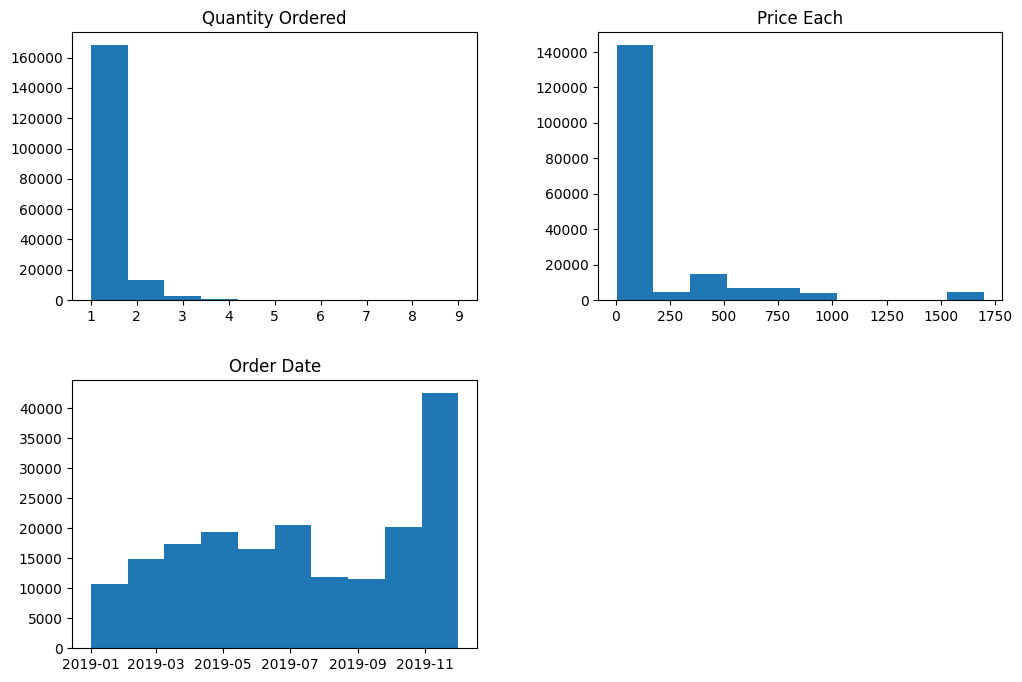

In [229]:
# Visualizing the distribution of Numerical Variables
sales_data.hist(figsize=(12,8), grid= False)
plt.show()

1. The most frequent quantity ordered 1.
2. The most frequent price of each product is between 0-200

In general, there seems to be no correlation between the quantity ordered and the price per order. There are expensive orders for small quantities and cheap orders for large quantities.



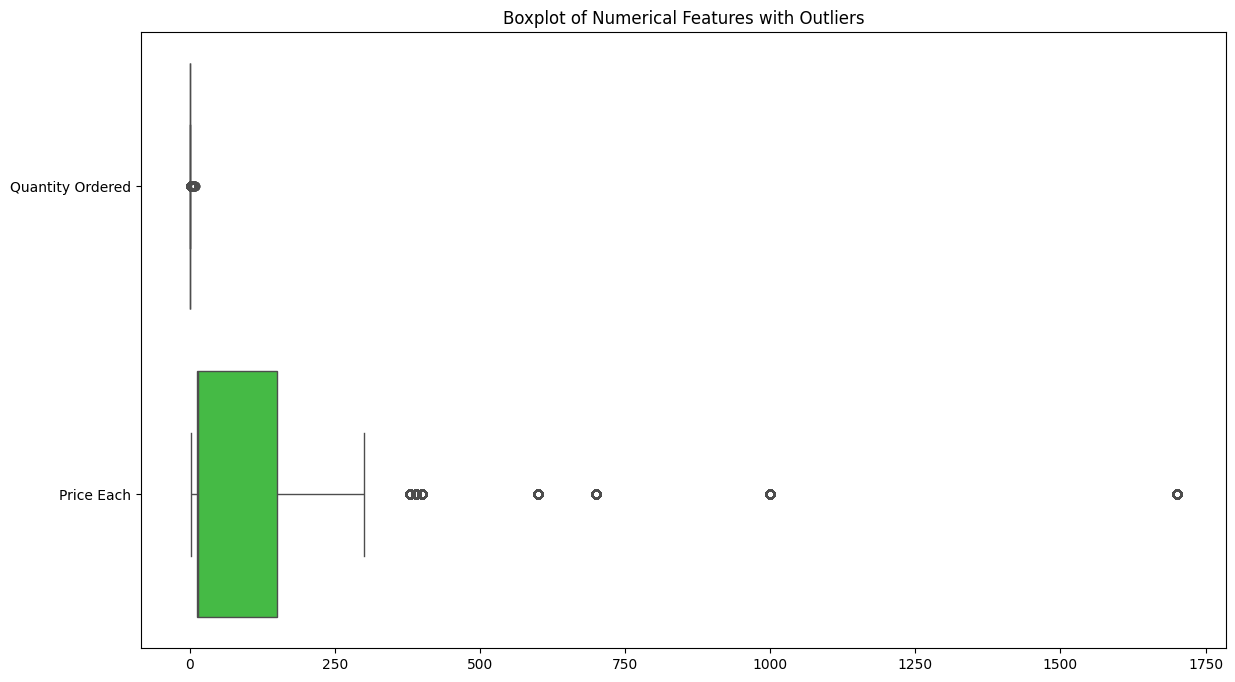

In [230]:
# Create a single boxplot to show outliers
cols = [ 'Quantity Ordered', 'Price Each']

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=sales_data[cols], whis=1.5, orient='h', palette=['skyblue', 'limegreen'])
plt.title("Boxplot of Numerical Features with Outliers")
plt.show()

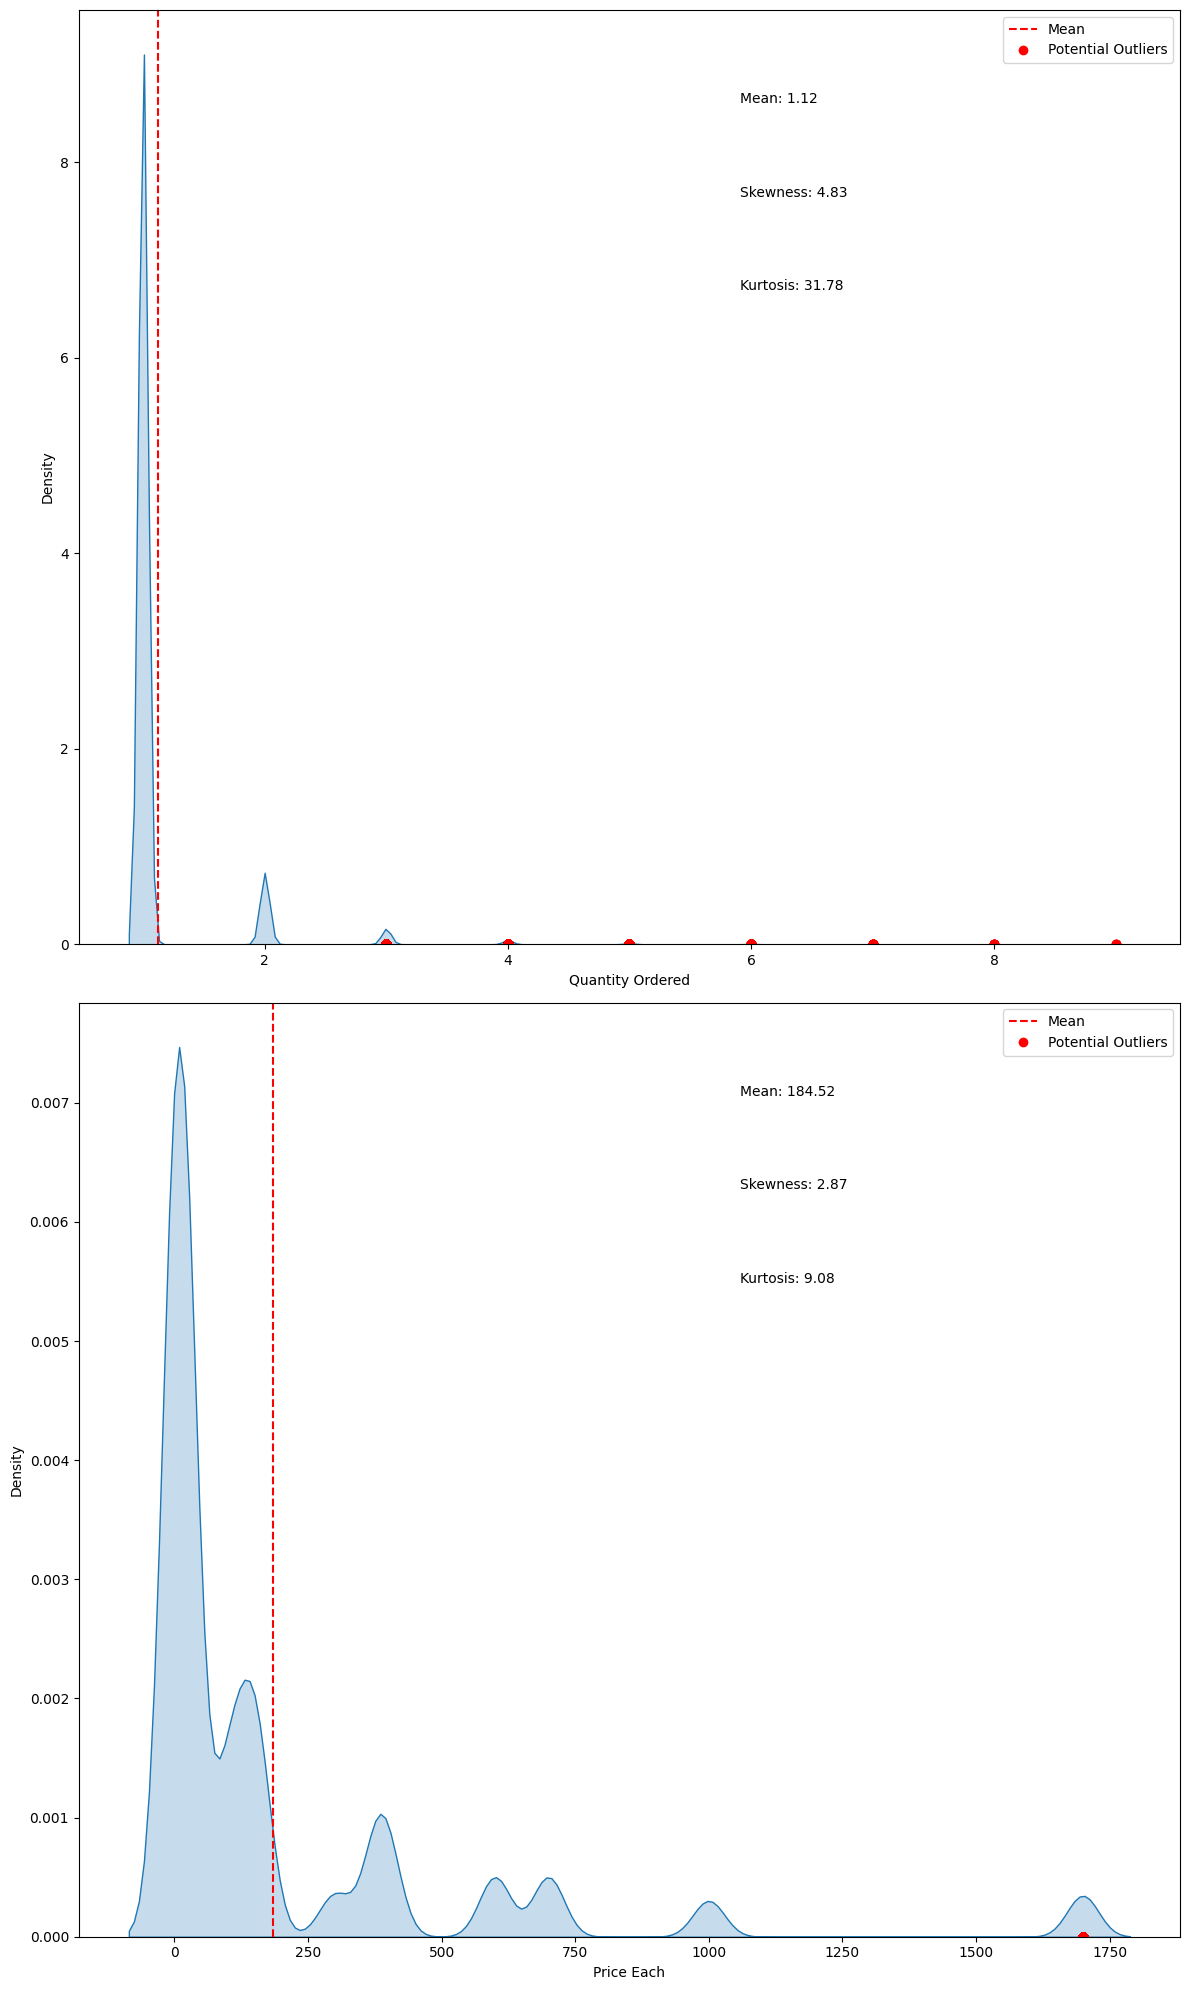

In [231]:
#Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols), figsize=(12, 20))
for i, col in enumerate(cols):
    sns.kdeplot(data=sales_data, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
   
    # Calculate mean, skewness, and kurtosis
    mean_val = sales_data[col].mean()
    skewness_val = sales_data[col].skew()
    kurtosis_val = sales_data[col].kurtosis()
   
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
   
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
   
    # Add red dots to indicate potential outliers
    outliers = sales_data[(sales_data[col] > mean_val + 3 * sales_data[col].std()) | (sales_data[col] < mean_val - 3 * sales_data[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
   
    # Add legend
    axes[i].legend()
   
plt.tight_layout()
plt.show()

observations:
1. the quantity ordered has a skweness of 4.83, so it suggests a positive skewness.The distribution  is heavily skewed towards higher values, with a long tail on the right side.
2. The price data exhibits significant positive skewness and high kurtosis, indicating a distribution that is highly right-skewed with heavy tails and a sharp peak around the mean price. This suggests that while most prices are clustered around the mean, there are notable outliers or extreme values at both ends of the price spectrum

### 2. <b> Bivariate Data analysis

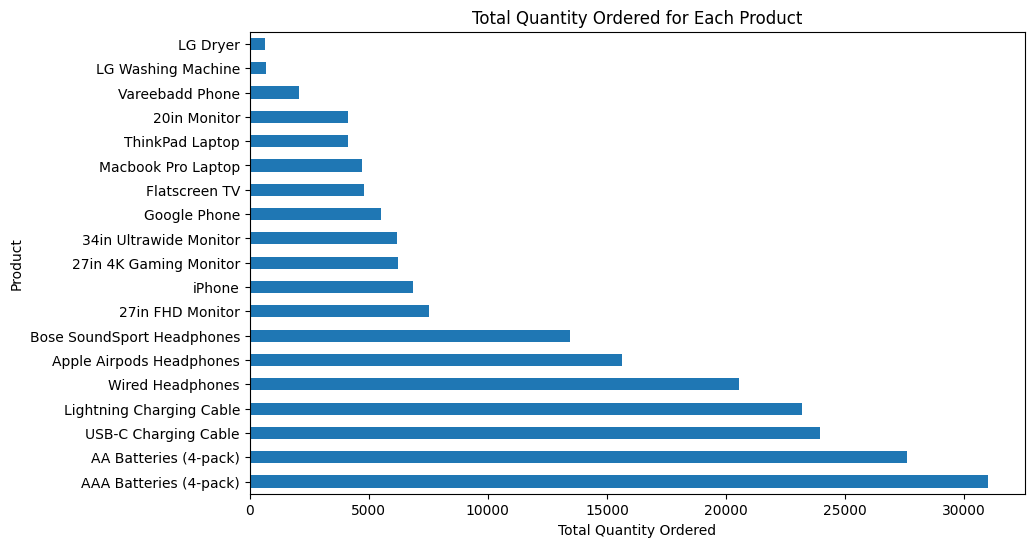

In [232]:
product_quantity = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
product_quantity.plot(kind='barh', figsize=(10, 6))  # Changing the plot type to 'barh' for horizontal bar plot
plt.title('Total Quantity Ordered for Each Product')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product')
plt.show()



From this chart, we can observe that the AAA Batteries (4-pack) are the most ordered product, with a total quantity that appears to be just shy of 30,000. The next most ordered product is the AA Batteries (4-pack), followed by the USB-C Charging Cable and the Lightning Charging Cable. These items are typically consumable or commonly used accessories, which may explain their higher order quantities.

On the other end of the spectrum, the least ordered products are the LG Dryer and the LG Washing Machine. This could be due to several factors, such as higher prices, lower purchase frequency, or less demand compared to smaller electronic accessories.

A notable observation from the mid-range of the product order quantities is that personal electronics like the MacBook Pro Laptop, ThinkPad Laptop, and various types of phones and monitors have a moderate level of orders, indicating a steady but lower demand compared to the cheaper, more consumable products.

Overall, the chart indicates a trend where lower-cost and frequently used items have higher order volumes, while more expensive and durable goods have lower order volumes. This pattern is typical in consumer electronics markets where small accessories are purchased more frequently than large appliances or high-end electronics.

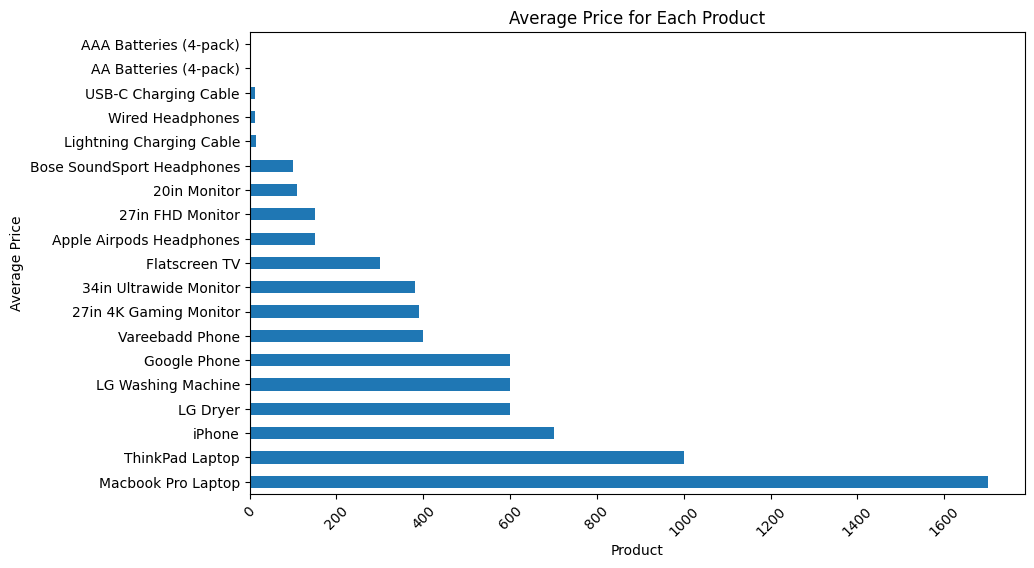

In [233]:
# Product and Price Each
product_price = sales_data.groupby('Product')['Price Each'].mean().sort_values(ascending=False)
product_price.plot(kind='barh', figsize=(10, 6))
plt.title('Average Price for Each Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Here are a few observations from the chart above:

Product Price Range: There is a wide range of average prices among the products displayed. The lowest average price products are the AAA and AA batteries, while the highest average price is attributed to the MacBook Pro Laptop.

Grouping by Price: The products seem to group into distinct categories based on their average price. Small accessories like batteries and charging cables are at the lower end, personal audio and monitors are in the middle range, while major appliances and high-end electronics like the MacBook Pro and iPhone are at the higher end.

Variability in Price: There is significant variability in the average price of products, indicating a diverse set of items with different value propositions and target markets. For instance, the average price of a MacBook Pro Laptop is substantially higher than any other product on the list, which suggests it is likely a high-end product with premium features and branding.

Comparison of Similar Products: Within similar product categories, there is a range of average prices that could reflect different brand values, features, or specifications. For example, the Apple Airpods Headphones have a higher average price compared to other audio products like the Bose SoundSport Headphones or Wired Headphones, indicating brand value or feature differences.

Tech Product Categories: The graph covers a broad spectrum of tech product categories from simple consumables to complex electronics, which might be used to analyze market trends, consumer spending, or to inform stocking decisions for retailers.

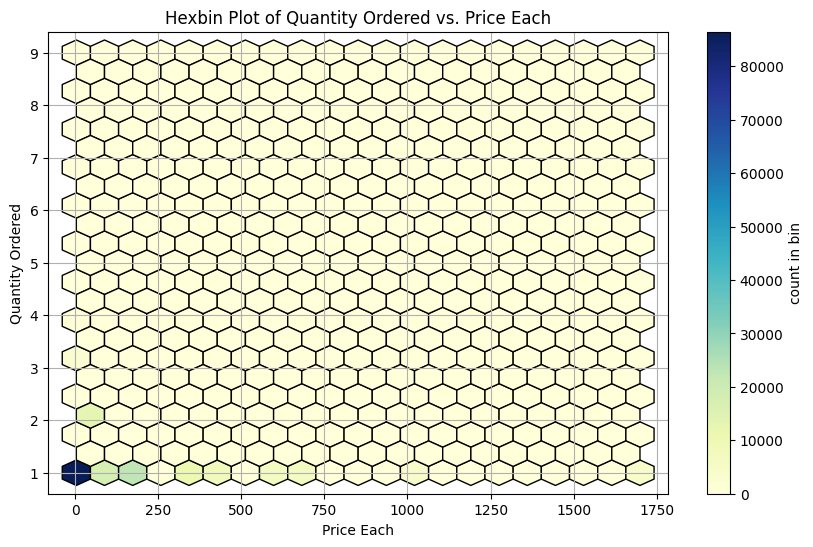

In [234]:
# Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(sales_data['Price Each'], sales_data['Quantity Ordered'], gridsize=20, cmap='YlGnBu', edgecolors='k')
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot of Quantity Ordered vs. Price Each')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()


Distribution of Orders:
The majority of orders fall into the lower price range, as indicated by the concentration of darker hexbins in the lower left corner.
These darker hexbins represent higher counts of orders for items with lower prices.
Price and Quantity Relationship:
As the price each decreases, there is a trend of increased quantity ordered.
This suggests that customers are more likely to order larger quantities when the price per item is lower.
Sparse Areas:
Most hexbins are light-colored, indicating low counts.
There are fewer orders for items with higher prices.
Overall Trend:
The graph shows that quantity ordered tends to be higher for lower-priced items.

### <b> Multivariate Analysis

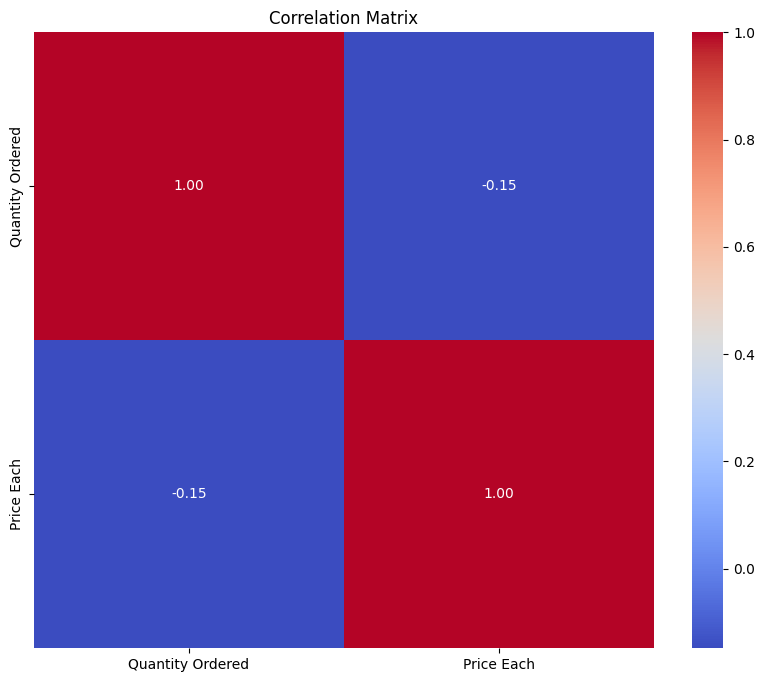

In [235]:
# Select only numerical columns
numerical_columns = sales_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The heat map represents a correlation matrix between two variables: “Quantity Ordered” (on the y-axis) and “Price Each” (on the x-axis).
The color scale ranges from blue (negative correlation) to red (positive correlation).

Key observations:
There is a perfect positive correlation of 1.00 between “Quantity Ordered” and itself (indicated by the red square in the top left corner).
Similarly, there is a perfect positive correlation of 1.00 between “Price Each” and itself (shown by the red square in the bottom right corner).
However, there is a weak negative correlation of approximately -0.15 between “Quantity Ordered” and “Price Each” (represented by the blue square in the top right corner).

Interpretation:
When “Quantity Ordered” increases, there is a corresponding increase in “Price Each” (positive correlation).
The weak negative correlation suggests that as “Quantity Ordered” goes up, there is a slight decrease in the unit price (“Price Each”).

Practical Implications:
Businesses can use this information to optimize pricing strategies.
Understanding the relationship between quantity and price helps in decision-making, inventory management, and revenue forecasting.

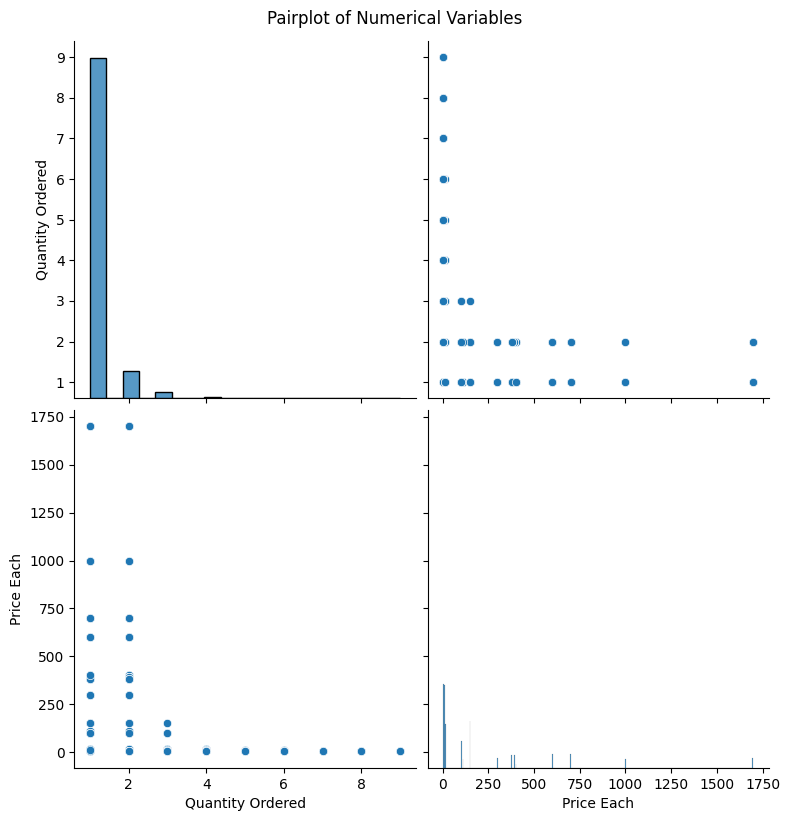

In [236]:
# Pairplot
sns.pairplot(sales_data, height=4)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


Pairplot Overview:

The plot displays a pairplot of two numerical variables: “Quantity Ordered” and “Price Each.”
The diagonal contains histograms for each variable, while the off-diagonal cells show scatter plots.
The x-axis labels represent “Quantity Ordered,” and the y-axis labels represent “Price Each.”

Histograms:

Quantity Ordered: The histogram for quantity ordered shows a significant spike at lower quantities. Most orders appear to be for small quantities.
Price Each: The histogram for price each does not reveal a clear pattern or trend. Prices vary widely.

Scatter Plots:

There is no strong linear correlation between “Quantity Ordered” and “Price Each.” The scatter plots do not exhibit any distinct trend.
The data points are scattered across the plot, indicating that the relationship between these variables is not straightforward.

 ## **The Hypothesis**

 **Null Hypothesis:** There is no difference in revenue generated between different product categories.
  
  **Alternative Hypothesis:** Certain product categories generate significantly more revenue compared to others.

In [237]:
# Calculate revenue
sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# Extract revenue for each product category
electronics_revenue = sales_data[sales_data['Product Category'] == 'Electronics']['Revenue']
accessories_revenue = sales_data[sales_data['Product Category'] == 'Accessories']['Revenue']
others_revenue = sales_data[sales_data['Product Category'] == 'Others']['Revenue']

# Perform ANOVA test
statistic, p_value = f_oneway(electronics_revenue, accessories_revenue, others_revenue)

# Define significance level
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Certain product categories generate significantly more revenue compared to others.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no difference in revenue generated between different product categories.")


Fail to reject the null hypothesis.
There is no difference in revenue generated between different product categories.


C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


## **The Analytical Questions**

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. What are the best and worst-selling products?

1. How much money did we make this year? 

In [238]:
# Calculate revenue for each transaction
sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# Sum up the revenue column to calculate total revenue
total_revenue = sales_data['Revenue'].sum()

# Print the total revenue
print("Total revenue generated this year:", total_revenue)


Total revenue generated this year: 34465537.845666915


Based on the data available, the total revenue generated this year amounts to $34.57 million. This substantial revenue reflects the combined impact of both the “Accessories” and “Electronics” product categories. It’s essential to continue monitoring these trends to inform strategic decisions and optimize sales performance

2. Can we identify any seasonality in the  sales? 

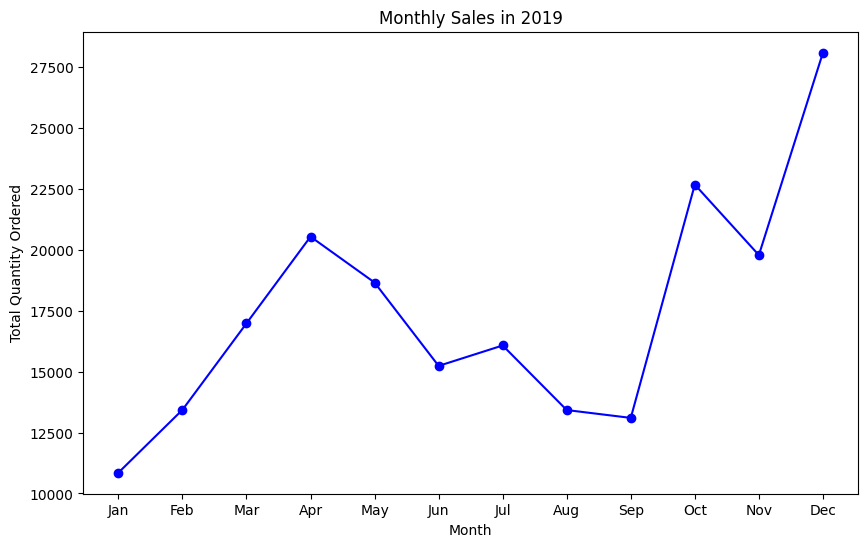

In [239]:
sales_data_2019 = sales_data[sales_data['Order Date'].dt.year == 2019].copy()

# Extract the month from the 'Order Date' column and assign it to a new column 'Order Month'
sales_data_2019.loc[:, 'Order Month'] = sales_data_2019['Order Date'].dt.month

# Group the sales data by month and sum the sales
monthly_sales_2019 = sales_data_2019.groupby('Order Month')['Quantity Ordered'].sum()

# Reindex the monthly_sales_2019 DataFrame to include all 12 months
monthly_sales_2019 = monthly_sales_2019.reindex(range(1, 13), fill_value=0)


# Plot the monthly sales data for the year 2019
monthly_sales_2019.plot(kind='line', figsize=(10, 6), marker='o', color='b', linestyle='-')
plt.title('Monthly Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(monthly_sales_2019.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

1. **Seasonality Overview**:
   - The line graph titled "Monthly Sales in 2019" reveals patterns that suggest **seasonal fluctuations**.
   - Sales exhibit recurring cycles throughout the year.

2. **Monthly Trends**:
   - **March**: Sales peak at over 20,000.
   - **May and June**: There is a noticeable dip, reaching its lowest point at approximately 12,500.
   - **July to December**: Sales gradually increase, with another significant peak in December (approximately 27,500).

3. **Interpretation**:
   - The upward trend from July to December aligns with the **holiday season**, indicating strong sales during this period.
   - The cyclic behavior suggests that sales are influenced by **seasonal factors**.

In summary, the sales data exhibits seasonality, with notable peaks around March and December. Understanding these patterns can inform business strategies and forecasting efforts.


3. What are our best and worst-selling products?

In [240]:
# Group the sales data by product and sum the quantity ordered for each product
product_sales = sales_data.groupby('Product')['Quantity Ordered'].sum()

# Sort the products based on total quantity ordered in descending order
product_sales_sorted = product_sales.sort_values(ascending=False)

# Best-selling product (product with the highest quantity ordered)
best_selling_product = product_sales_sorted.index[0]

# Worst-selling product (product with the lowest quantity ordered)
worst_selling_product = product_sales_sorted.index[-1]

print("Best-selling product:", best_selling_product)
print("Worst-selling product:", worst_selling_product)


Best-selling product: AAA Batteries (4-pack)
Worst-selling product: LG Dryer


The main factor that can be attributed to the observation above is:

**Utility and Frequency of Use**: AAA batteries are commonly used in many household items such as remote controls, toys, flashlights, etc. They are consumable goods, meaning people need to regularly replace them. On the other hand, a dryer is a large appliance that people typically purchase infrequently and expect to last for several years without needing replacement.

Other factors include:

**Seasonal Variations**: The demand for AAA batteries might be relatively consistent throughout the year, whereas the demand for dryers could fluctuate based on factors like seasons (e.g., more people buying dryers during colder, wetter months).

**Price Sensitivity and Disposable Income**: AAA batteries are generally inexpensive and considered essential items for many households, making them an easy and frequent purchase. Dryers, on the other hand, are larger investments that require more consideration and planning, especially if they're high-end models.



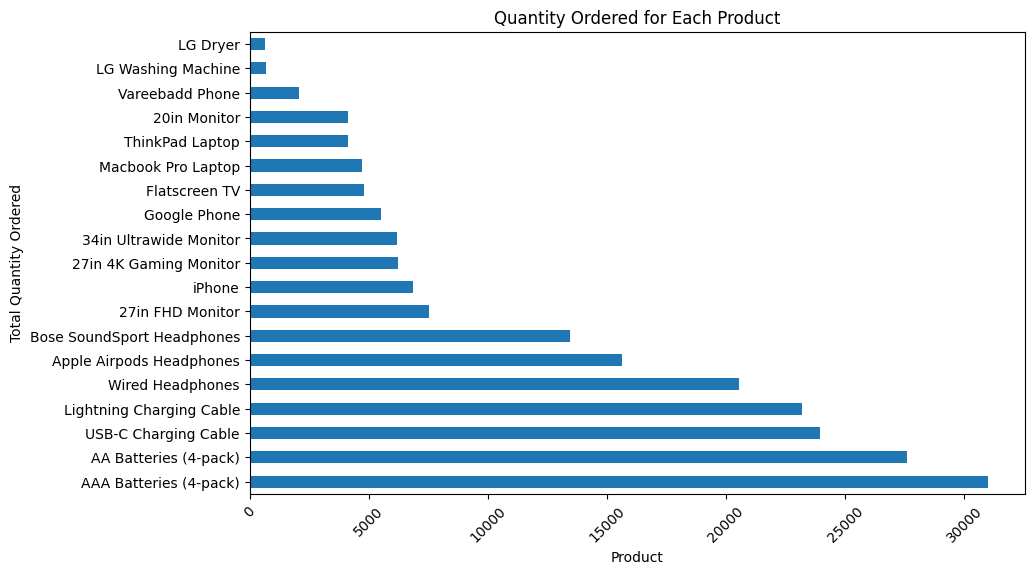

In [241]:
# Plot the quantity ordered for each product
plt.figure(figsize=(10, 6))
product_sales_sorted.plot(kind='barh')
plt.title('Quantity Ordered for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

4. How do sales compare to previous months or weeks? 

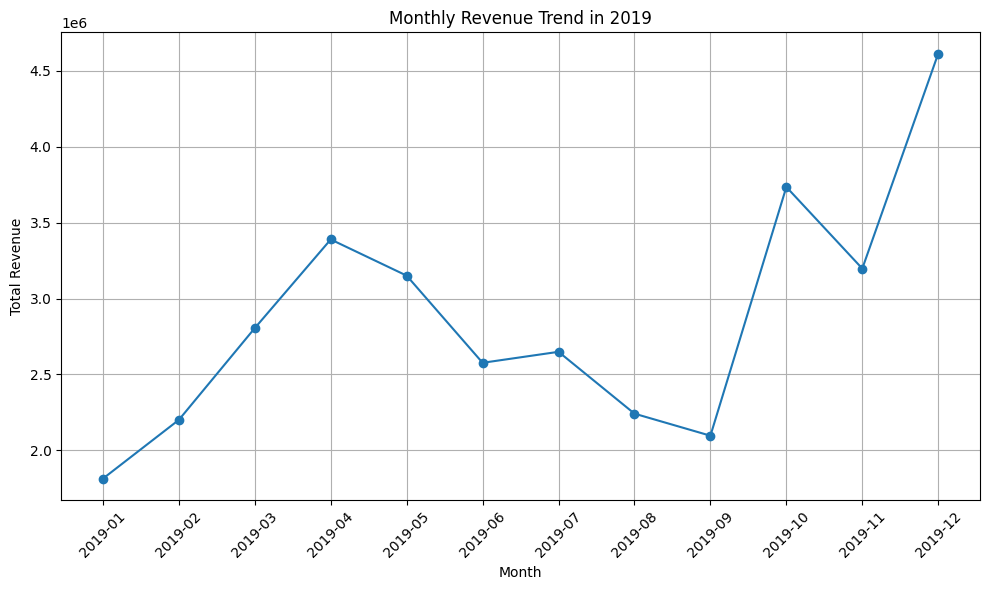

In [242]:
# Filter data for the year 2019
sales_data_2019 = sales_data[sales_data['Order Date'].dt.year == 2019].copy()

# Calculate revenue for each transaction
sales_data_2019['Revenue'] = sales_data_2019['Quantity Ordered'] * sales_data_2019['Price Each']

# Group by month and sum up the revenue for each month
monthly_revenue = sales_data_2019.groupby(sales_data_2019['Order Date'].dt.to_period('M'))['Revenue'].sum()

# Reset index to convert the grouped data back to a DataFrame
monthly_revenue = monthly_revenue.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Order Date'].astype(str), monthly_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Monthly Revenue Trend in 2019')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

comparing sales to previous months:

January to July Decline:
From January to July, sales gradually decreased.
The lowest point was in July (around 2.5 million in revenue).

August to October Stability:

In August, there was a slight increase in sales.
Sales remained relatively stable from August to October.

November and December Surge:

The most significant change occurred from October to December.
Sales skyrocketed, reaching their peak in December (close to 4.5 million in revenue).

In summary, sales experienced a seasonal surge towards the end of the year, likely influenced by holiday shopping. The upward trend in November and December suggests successful year-end sales efforts.

5. Which cities are our products delivered to most? 

In [243]:
# Extract city information from 'Purchase Address'
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# Count the occurrences of each city
city_counts = sales_data['City'].value_counts()

# Now you can identify the cities where our products are delivered to most
print("Top 5 cities where our products are delivered to most:")
print(city_counts.head())

Top 5 cities where our products are delivered to most:
City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Name: count, dtype: int64


The observation regarding product deliveries indicates that San Francisco has the highest volume of deliveries, with a count of 20,506. Following San Francisco, Los Angeles and New York City also exhibit substantial delivery volumes, with 13,665 and 11,357 deliveries, respectively. Additionally, Boston and Atlanta demonstrate significant delivery numbers, with 9,044 and 6,868 deliveries, respectively. These figures suggest a concentration of product distribution in major urban centers, particularly in San Francisco, Los Angeles, and New York City. Understanding these delivery patterns can help in strategic planning, resource allocation, and targeted marketing efforts to maximize sales potential in these key metropolitan areas.

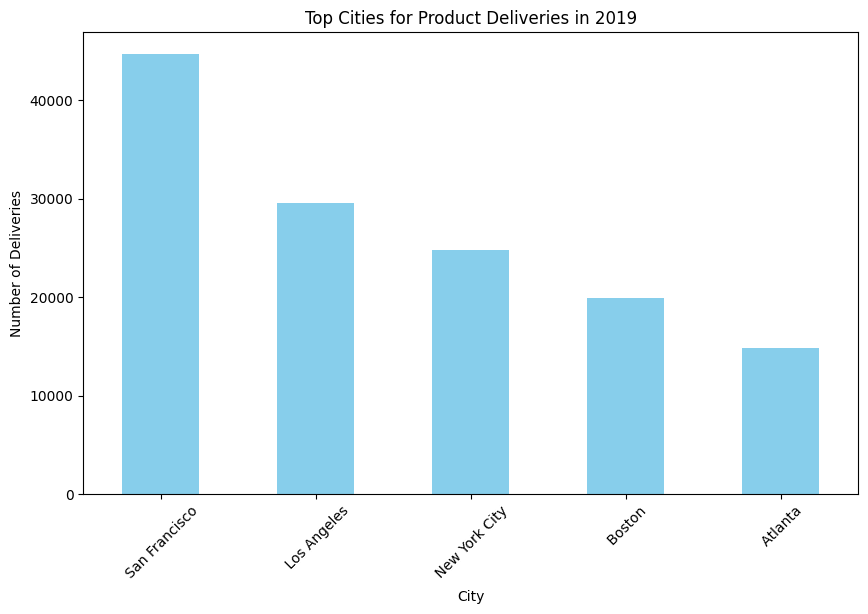

In [244]:
# Plotting the top cities for 2019
plt.figure(figsize=(10, 6))
city_counts.head().plot(kind='bar', color='skyblue')
plt.title('Top Cities for Product Deliveries in 2019')
plt.xlabel('City')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.show()

6. How do product categories compare in revenue generated and quantities  ordered? 

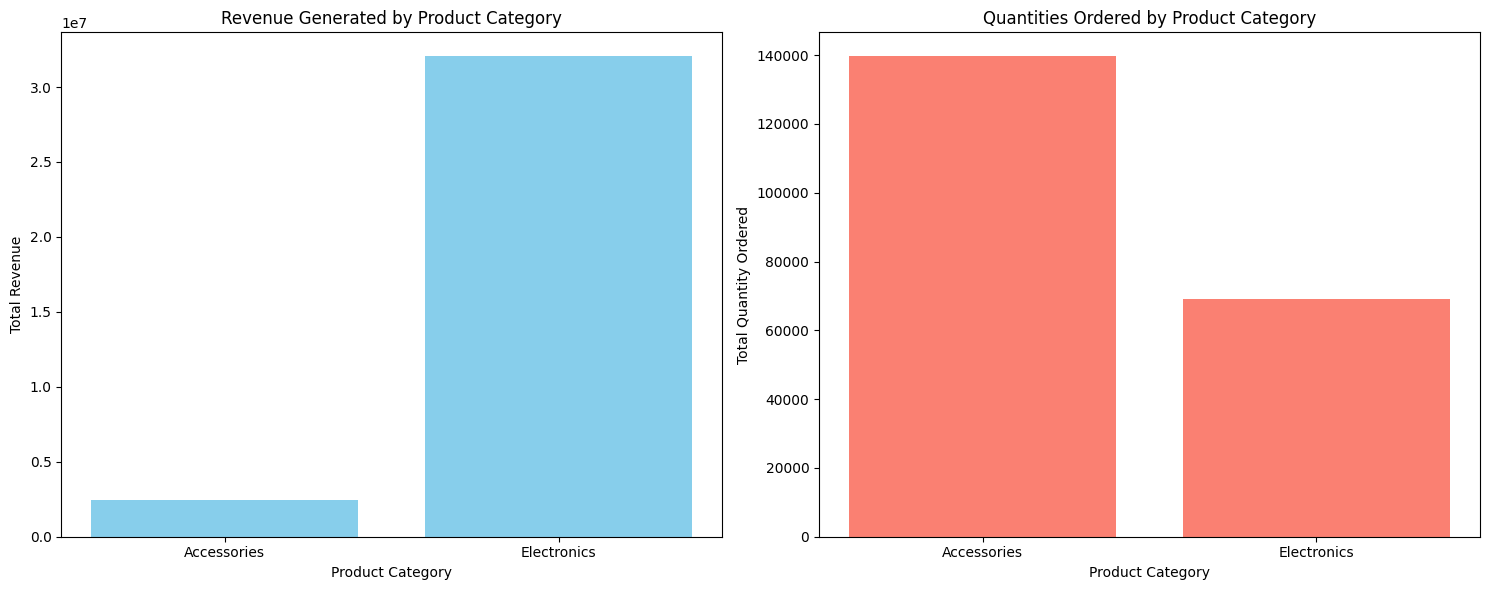

In [245]:
# Group the sales data by product category and calculate total revenue and quantity ordered
category_comparison = sales_data.groupby('Product Category').agg({'Revenue': 'sum', 'Quantity Ordered': 'sum'})

# Plot the comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Revenue comparison
ax[0].bar(category_comparison.index, category_comparison['Revenue'], color='skyblue')
ax[0].set_title('Revenue Generated by Product Category')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Total Revenue')

# Quantity ordered comparison
ax[1].bar(category_comparison.index, category_comparison['Quantity Ordered'], color='salmon')
ax[1].set_title('Quantities Ordered by Product Category')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Total Quantity Ordered')

plt.tight_layout()
plt.show()

1. Revenue by Product Category:
The graph on the left shows the revenue generated by two product categories: “Accessories” and “Electronics.”
The “Electronics” category has significantly higher revenue compared to “Accessories.”
This suggests that electronics products contribute more to overall revenue.
2. Quantities Ordered by Product Category:
The graph on the right displays the quantities ordered for the same product categories.
Interestingly, “Accessories” have a higher quantity ordered compared to “Electronics.”
Despite lower revenue, accessories seem to be more popular in terms of the number of orders.
In summary, while electronics generate substantial revenue, accessories attract more customers in terms of quantity ordered. This information could be valuable for decision-making and business strategy

7. Are there any price ranges that attract more customers?

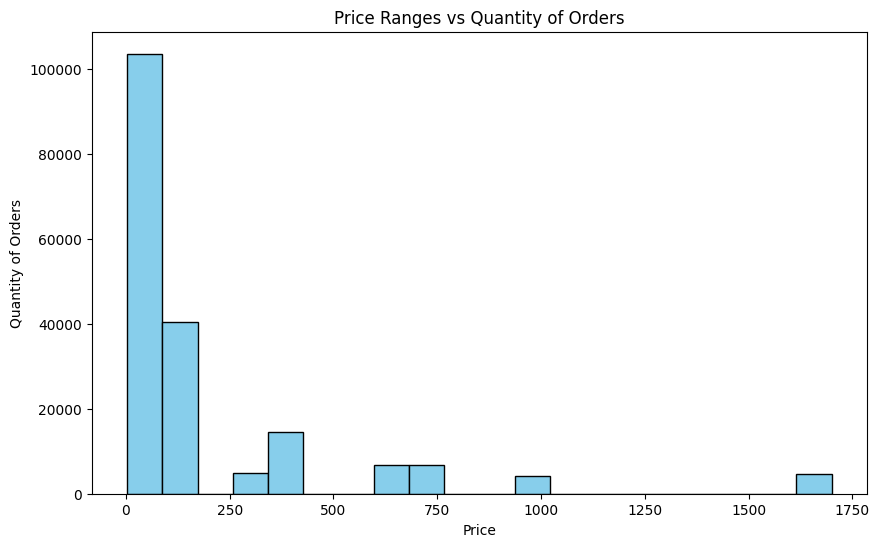

In [246]:
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Price Each'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Ranges vs Quantity of Orders')
plt.xlabel('Price')
plt.ylabel('Quantity of Orders')
plt.grid(False)  
plt.show()

1. Distribution of Orders by Price Range:
The majority of orders fall within the 0-250 price range, as indicated by the very tall bar. Nearly 100,000 orders were placed in this range.
As the price range increases, the quantity of orders decreases significantly.
2. Decreasing Order Volume with Higher Prices:
The shorter bars represent higher price ranges (250-500, 500-750, etc.). These ranges have significantly fewer orders.
The trend suggests that customers are more likely to make purchases for products priced below 250 dollars.
3. Business Implications:
To drive sales, consider focusing on products within the lower price range, as they attract the highest order volume.
For higher-priced items, targeted marketing efforts or promotions may be necessary to boost sales.

## **Conclusion**

1. Product Deliveries by City:
San Francisco leads with the highest volume of deliveries (20,506).
Los Angeles and New York City follow closely with 13,665 and 11,357 deliveries, respectively.
Boston and Atlanta also demonstrate significant delivery numbers (9,044 and 6,868, respectively).
Concentration in major urban centers (San Francisco, Los Angeles, and New York City) suggests strategic planning opportunities for resource allocation and targeted marketing efforts
2. Revenue by Product Category:
The graph on the left shows revenue generated by two product categories: “Accessories” and “Electronics.”
“Electronics” significantly outperforms “Accessories” in terms of revenue.
This indicates that electronics products contribute more to overall revenue.
3. Quantities Ordered by Product Category:
The graph on the right displays quantities ordered for the same product categories.
Interestingly, “Accessories” have a higher quantity ordered compared to “Electronics.”
Despite lower revenue, accessories seem to be more popular in terms of the number of orders.
4. Distribution of Orders by Price Range:
The majority of orders fall within the 0-250 price range, as indicated by the very tall bar. Nearly 100,000 orders were placed in this range.
As the price range increases, the quantity of orders decreases significantly.
The shorter bars represent higher price ranges (250-500, 500-750, etc.), which have significantly fewer orders.

In conclusion, while electronics generate substantial revenue, accessories attract more customers in terms of quantity ordered. Understanding these patterns can inform decision-making and business strategy. 📊💡




